Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
###
### Input delta in folder :  /data
configs = {"analytics_date":"2020-11-13"}
anltdate="2020-11-13"
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+------------------

In [1]:
#sc.stop()

#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [2]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
configs = {"analytics_date":"2020-11-13"}
anltdate="2020-11-13"
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [3]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [4]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-11-13  Afghanistan_nan         0         186.0         498.0   
1  2020-11-13      Albania_nan         0         410.0        1480.0   
2  2020-11-13      Algeria_nan         0         851.0        2415.0   
3  2020-11-13      Andorra_nan         0          49.0         179.0   
4  2020-11-13       Angola_nan         0         100.0         373.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         860.0              42795.0               42875.0  35530000.0   
1        3490.0              26211.0               26751.0   2878445.0   
2        4939.0              65108.0               65684.0  41320000.0   
3         481.0               5616.0                5700.0     77239.0   
4         951.0              13053.0               13244.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001205   
1                                       0.009106   
2                                       0.001576   
3                                       0.072721   
4                                       0.000397   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.012045                     80.0   
1                                           0.091063                    540.0   
2                                           0.015757                    576.0   
3                                           0.727214                     84.0   
4                                           0.003972                    191.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    2.251618             122.857140   
1                  187.601288             498.571442   
2                   13.939981             705.571411   
3                 1087.533447              68.714287   
4                    5.811429             135.857147   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           4.840980      
1                                         242.492035      
2                                          23.906099      
3                                        1245.484741      
4                                           5.787088

In [5]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} 
    order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +80 cases a day AVG last 7days 

In [6]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-13' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-13           United States_nan          131445.281250   
1   2020-11-13                  France_nan           37507.144531   
2   2020-11-13                   Italy_nan           34503.144531   
3   2020-11-13                  Brazil_nan           27365.285156   
4   2020-11-13                  Poland_nan           24973.857422   
5   2020-11-13          United Kingdom_nan           23856.857422   
6   2020-11-13                  Russia_nan           20569.000000   
7   2020-11-13                 Germany_nan           18808.572266   
8   2020-11-13                   Spain_nan           18700.572266   
9   2020-11-13                 Ukraine_nan           10303.571289   
10  2020-11-13                    Iran_nan           10235.571289   
11  2020-11-13               Argentina_nan            9641.571289   
12  2020-11-13                 Romania_nan            8204.857422   
13  2020-11-13                Colombia_nan            8005.000000   
14  2020-11-13                 Czechia_nan            7818.571289   
15  2020-11-13                 Austria_nan            7018.143066   
16  2020-11-13             Switzerland_nan            6841.714355   
17  2020-11-13                 Belgium_nan            5864.571289   
18  2020-11-13             Netherlands_nan            5709.285645   
19  2020-11-13                Portugal_nan            5237.285645   
20  2020-11-13                  Jordan_nan            5174.571289   
21  2020-11-13                 Morocco_nan            5124.285645   
22  2020-11-13                 Hungary_nan            4553.428711   
23  2020-11-13                  Sweden_nan            4228.714355   
24  2020-11-13                Bulgaria_nan            3197.142822   
25  2020-11-13                    Iraq_nan            3176.428467   
26  2020-11-13                 Georgia_nan            2923.285645   
27  2020-11-13                   Nepal_nan            2609.714355   
28  2020-11-13                  Serbia_nan            2584.142822   
29  2020-11-13                  Greece_nan            2404.285645   
30  2020-11-13                 Croatia_nan            2358.142822   
31  2020-11-13                    Peru_nan            1897.714233   
32  2020-11-13                 Armenia_nan            1873.857178   
33  2020-11-13                Slovakia_nan            1862.571411   
34  2020-11-13                 Lebanon_nan            1645.285767   
35  2020-11-13  Bosnia and Herzegovina_nan            1541.000000   
36  2020-11-13               Lithuania_nan            1531.571411   
37  2020-11-13              Canada_Ontario            1473.000000   
38  2020-11-13                   Chile_nan            1408.000000   
39  2020-11-13                Slovenia_nan            1396.571411   
40  2020-11-13                 Tunisia_nan            1396.000000   
41  2020-11-13              Azerbaijan_nan            1334.714233   
42  2020-11-13               Canada_Quebec            1262.571411   
43  2020-11-13    United Arab Emirates_nan            1162.285767   
44  2020-11-13         North Macedonia_nan            1066.142822   
45  2020-11-13                 Denmark_nan            1030.000000   
46  2020-11-13                 Belarus_nan            1022.857117   
47  2020-11-13                  Panama_nan             969.285706   
48  2020-11-13              Costa Rica_nan             938.857117   
49  2020-11-13                 Moldova_nan             924.571411   
50  2020-11-13                   Libya_nan             909.142883   
51  2020-11-13              Canada_Alberta             851.142883   
52  2020-11-13                  Kuwait_nan             756.285706   
53  2020-11-13                  Kosovo_nan             668.857117   
54  2020-11-13                  Israel_nan             613.714294   
55  2020-11-13      West Bank and Gaza_nan             587.428589   
56  2020-11-13              Luxembourg_nan             581.571411   
57  2020

In [7]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-13' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                    region  delta_roling_7day_AVG  \
0   2020-11-13         United States_nan          131445.281250   
1   2020-11-13                France_nan           37507.144531   
2   2020-11-13                 Italy_nan           34503.144531   
3   2020-11-13                Brazil_nan           27365.285156   
4   2020-11-13                Poland_nan           24973.857422   
5   2020-11-13        United Kingdom_nan           23856.857422   
6   2020-11-13                Russia_nan           20569.000000   
7   2020-11-13               Germany_nan           18808.572266   
8   2020-11-13                 Spain_nan           18700.572266   
9   2020-11-13               Ukraine_nan           10303.571289   
10  2020-11-13                  Iran_nan           10235.571289   
11  2020-11-13             Argentina_nan            9641.571289   
12  2020-11-13               Romania_nan            8204.857422   
13  2020-11-13              Colombia_nan            8005.000000   
14  2020-11-13               Czechia_nan            7818.571289   
15  2020-11-13               Austria_nan            7018.143066   
16  2020-11-13           Switzerland_nan            6841.714355   
17  2020-11-13               Belgium_nan            5864.571289   
18  2020-11-13           Netherlands_nan            5709.285645   
19  2020-11-13              Portugal_nan            5237.285645   
20  2020-11-13                Jordan_nan            5174.571289   
21  2020-11-13               Morocco_nan            5124.285645   
22  2020-11-13               Hungary_nan            4553.428711   
23  2020-11-13                Sweden_nan            4228.714355   
24  2020-11-13              Bulgaria_nan            3197.142822   
25  2020-11-13                  Iraq_nan            3176.428467   
26  2020-11-13               Georgia_nan            2923.285645   
27  2020-11-13                 Nepal_nan            2609.714355   
28  2020-11-13                Serbia_nan            2584.142822   
29  2020-11-13                Greece_nan            2404.285645   
..         ...                       ...                    ...   
41  2020-11-13            Azerbaijan_nan            1334.714233   
42  2020-11-13             Canada_Quebec            1262.571411   
43  2020-11-13  United Arab Emirates_nan            1162.285767   
44  2020-11-13       North Macedonia_nan            1066.142822   
45  2020-11-13               Denmark_nan            1030.000000   
46  2020-11-13               Belarus_nan            1022.857117   
47  2020-11-13                Panama_nan             969.285706   
48  2020-11-13            Costa Rica_nan             938.857117   
49  2020-11-13               Moldova_nan             924.571411   
50  2020-11-13                 Libya_nan             909.142883   
51  2020-11-13            Canada_Alberta             851.142883   
52  2020-11-13                Kuwait_nan             756.285706   
53  2020-11-13                Kosovo_nan             668.857117   
54  2020-11-13                Israel_nan             613.714294   
55  2020-11-13    West Bank and Gaza_nan             587.428589   
56  2020-11-13            Luxembourg_nan             581.571411   
57  2020-11-13                Norway_nan             571.285706   
58  2020-11-13            Montenegro_nan             568.000000   
59  2020-11-13              Paraguay_nan             553.571411   
60  2020-11-13   Canada_British Columbia             544.142883   
61  2020-11-13            Kyrgyzstan_nan             511.142853   
62  2020-11-13               Albania_nan             498.571442   
63  2020-11-13           Canada_Manitoba             372.142853   
64  2020-11-13               Ireland_nan             369.428558   
65  2020-11-13                  Oman_nan             325.000000   
66  2020-11-13                Latvia_nan             323.142853   
67  2020-11-13   France_French Polynesia             247.285721   
68  2020-11-13                 Qatar_nan             216.

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-13' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-11-13           United States_nan          131445.281250   
1   2020-11-13                  France_nan           37507.144531   
2   2020-11-13                   Italy_nan           34503.144531   
3   2020-11-13                  Poland_nan           24973.857422   
4   2020-11-13          United Kingdom_nan           23856.857422   
5   2020-11-13                 Germany_nan           18808.572266   
6   2020-11-13                   Spain_nan           18700.572266   
7   2020-11-13                 Ukraine_nan           10303.571289   
8   2020-11-13               Argentina_nan            9641.571289   
9   2020-11-13                 Romania_nan            8204.857422   
10  2020-11-13                 Czechia_nan            7818.571289   
11  2020-11-13                 Austria_nan            7018.143066   
12  2020-11-13             Switzerland_nan            6841.714355   
13  2020-11-13                 Belgium_nan            5864.571289   
14  2020-11-13             Netherlands_nan            5709.285645   
15  2020-11-13                Portugal_nan            5237.285645   
16  2020-11-13                  Jordan_nan            5174.571289   
17  2020-11-13                 Hungary_nan            4553.428711   
18  2020-11-13                  Sweden_nan            4228.714355   
19  2020-11-13                Bulgaria_nan            3197.142822   
20  2020-11-13                 Georgia_nan            2923.285645   
21  2020-11-13                  Serbia_nan            2584.142822   
22  2020-11-13                  Greece_nan            2404.285645   
23  2020-11-13                 Croatia_nan            2358.142822   
24  2020-11-13                 Armenia_nan            1873.857178   
25  2020-11-13                Slovakia_nan            1862.571411   
26  2020-11-13                 Lebanon_nan            1645.285767   
27  2020-11-13  Bosnia and Herzegovina_nan            1541.000000   
28  2020-11-13               Lithuania_nan            1531.571411   
29  2020-11-13                Slovenia_nan            1396.571411   
30  2020-11-13         North Macedonia_nan            1066.142822   
31  2020-11-13                 Denmark_nan            1030.000000   
32  2020-11-13                  Panama_nan             969.285706   
33  2020-11-13              Costa Rica_nan             938.857117   
34  2020-11-13                 Moldova_nan             924.571411   
35  2020-11-13              Canada_Alberta             851.142883   
36  2020-11-13                  Kuwait_nan             756.285706   
37  2020-11-13                  Kosovo_nan             668.857117   
38  2020-11-13              Luxembourg_nan             581.571411   
39  2020-11-13              Montenegro_nan             568.000000   
40  2020-11-13                 Albania_nan             498.571442   
41  2020-11-13             Canada_Manitoba             372.142853   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          555.957458          153496.0   
1                                          750.250061               0.0   
2                                          798.683838           37977.0   
3                                          920.573975           22683.0   
4                                          502.703186           33470.0   
5                                          318.057739           24738.0   
6                                          561.097290           19511.0   
7                                          329.428314           11332.0   
8                                          299.250427           11163.0   
9                                          588.161804           10142.0   
10                                        1022.542725            7870.0   
11                                        1113.738403            9262.0   
12                                        1117.666260            69

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [9]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-13' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-11-13                Brazil_nan           27365.285156   
1   2020-11-13                Russia_nan           20569.000000   
2   2020-11-13                  Iran_nan           10235.571289   
3   2020-11-13              Colombia_nan            8005.000000   
4   2020-11-13               Morocco_nan            5124.285645   
5   2020-11-13                 Nepal_nan            2609.714355   
6   2020-11-13            Canada_Ontario            1473.000000   
7   2020-11-13               Tunisia_nan            1396.000000   
8   2020-11-13            Azerbaijan_nan            1334.714233   
9   2020-11-13             Canada_Quebec            1262.571411   
10  2020-11-13  United Arab Emirates_nan            1162.285767   
11  2020-11-13               Belarus_nan            1022.857117   
12  2020-11-13                 Libya_nan             909.142883   
13  2020-11-13    West Bank and Gaza_nan             587.428589   
14  2020-11-13                Norway_nan             571.285706   
15  2020-11-13   Canada_British Columbia             544.142883   
16  2020-11-13                Latvia_nan             323.142853   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          180.238892           33922.0   
1                                          199.284424           21333.0   
2                                          170.607071           11517.0   
3                                          220.758194            8686.0   
4                                          194.854965            6195.0   
5                                          124.696243            1913.0   
6                                          141.537399            1532.0   
7                                          165.739929            1584.0   
8                                          184.652359            1622.0   
9                                          208.320572            1365.0   
10                                         173.106384            1136.0   
11                                         151.534805            1098.0   
12                                         185.234451             919.0   
13                                         181.020737             719.0   
14                                         149.299988             717.0   
15                                         149.372543            1130.0   
16                                         239.308853             533.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0       106550.0      191557.0            5781582.0  212559008.0   
1        61681.0      143983.0            1843678.0  144500000.0   
2        33636.0       71649.0             726585.0   83993000.0   
3        24948.0       56035.0            1174012.0   50765952.0   
4        16870.0       35870.0             276821.0   36817128.0   
5         7218.0       18268.0             204242.0   29300000.0   
6         4449.0       10311.0              93145.0   14570000.0   
7         4537.0        9772.0              76106.0   11791968.0   
8         4170.0        9343.0              70216.0   10119557.0   
9         3905.0        8838.0             119894.0    8485000.0   
10        3446.0        8136.0             146735.0    9400000.0   
11        3193.0        7160.0             110455.0    9449974.0   
12        2764.0        6364.0              71804.0    6871292.0   
13        1946.0        4112.0              60784.0    4543126.0   
14        1903.0        3999.0              27228.0    5357000.0   
15        1655.0        3809.0              20369.0    5100000.0   
16        1194.0        2262.0               9381.0    1890444.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.271999           
1                                            0.127590           
2                               

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [10]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-13' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date          region  delta_roling_7day_AVG  \
0  2020-11-13        Iraq_nan            3176.428467   
1  2020-11-13        Peru_nan            1897.714233   
2  2020-11-13       Chile_nan            1408.000000   
3  2020-11-13      Israel_nan             613.714294   
4  2020-11-13    Paraguay_nan             553.571411   
5  2020-11-13  Kyrgyzstan_nan             511.142853   
6  2020-11-13     Ireland_nan             369.428558   
7  2020-11-13        Oman_nan             325.000000   
8  2020-11-13       Qatar_nan             216.142853   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         116.200676            3298.0   
1                                          80.825760            2575.0   
2                                         103.306885            1634.0   
3                                          98.622589             833.0   
4                                         108.976089             547.0   
5                                         109.684029             527.0   
6                                         104.996529             385.0   
7                                          98.144951             256.0   
8                                         105.426140             245.0   

   3_day_change  7_day_change  confirmed_yesterday  population  \
0       10073.0       22235.0             511806.0  38270000.0   
1        5673.0       13284.0             928006.0  32870710.0   
2        3559.0        9856.0             526438.0  19081012.0   
3        1975.0        4296.0             322159.0   8712000.0   
4        1705.0        3875.0              69653.0   7111652.0   
5        1497.0        3578.0              64887.0   6524195.0   
6         973.0        2586.0              66632.0   4925877.0   
7         939.0        2275.0             119442.0   4636000.0   
8         699.0        1513.0             135132.0   2870256.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.133736                   3137.0   
1                                           0.282320                   2221.0   
2                                           0.275897                   1342.0   
3                                           0.369789                    487.0   
4                                           0.097943                    525.0   
5                                           0.099457                    573.0   
6                                           0.135271                    374.0   
7                                           0.257642                    425.0   
8                                           0.470805                    201.0   

   delta_new_cases_per_1M_hab  
0                   81.970215  
1                   67.567749  
2                   70.331696  
3                   55.899910  
4                   73.822510  
5                   87.826927  
6                   75.925568  
7                   91.673859  
8                   70.028595

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-13' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                                      region  \
0   2020-11-13                             El Salvador_nan   
1   2020-11-13                                 Nigeria_nan   
2   2020-11-13                                   Ghana_nan   
3   2020-11-13                                  Angola_nan   
4   2020-11-13                            Korea, South_nan   
5   2020-11-13                             Afghanistan_nan   
6   2020-11-13                              Mozambique_nan   
7   2020-11-13                                 Bolivia_nan   
8   2020-11-13                                 Uruguay_nan   
9   2020-11-13                                Botswana_nan   
10  2020-11-13                                Cameroon_nan   
11  2020-11-13                                    Cuba_nan   
12  2020-11-13                                Zimbabwe_nan   
13  2020-11-13                                 Iceland_nan   
14  2020-11-13                           Cote d'Ivoire_nan   
15  2020-11-13                             China_Hong Kong   
16  2020-11-13                               Nicaragua_nan   
17  2020-11-13                               Singapore_nan   
18  2020-11-13                                   Niger_nan   
19  2020-11-13                              China_Shanghai   
20  2020-11-13                                 Vietnam_nan   
21  2020-11-13                                Thailand_nan   
22  2020-11-13                            Burkina Faso_nan   
23  2020-11-13                               China_Shaanxi   
24  2020-11-13                             New Zealand_nan   
25  2020-11-13                               China_Sichuan   
26  2020-11-13                                 Taiwan*_nan   
27  2020-11-13                   Australia_New South Wales   
28  2020-11-13                             China_Guangdong   
29  2020-11-13                                China_Fujian   
30  2020-11-13                               China_Tianjin   
31  2020-11-13                                Cambodia_nan   
32  2020-11-13                   Australia_South Australia   
33  2020-11-13                        China_Inner Mongolia   
34  2020-11-13                        Australia_Queensland   
35  2020-11-13                  United Kingdom_Isle of Man   
36  2020-11-13                                 China_Hubei   
37  2020-11-13                              China_Zhejiang   
38  2020-11-13                               China_Beijing   
39  2020-11-13                               China_Jiangsu   
40  2020-11-13                              China_Liaoning   
41  2020-11-13                                China_Shanxi   
42  2020-11-13                                 China_Anhui   
43  2020-11-13                                 China_Gansu   
44  2020-11-13                                 China_Henan   
45  2020-11-13  United Kingdom_Falkland Islands (Malvinas)   
46  2020-11-13                          Australia_Victoria   
47  2020-11-13                             China_Chongqing   
48  2020-11-13                               China_Guangxi   
49  2020-11-13                               China_Guizhou   
50  2020-11-13                                China_Hainan   
51  2020-11-13                                 China_Hebei   
52  2020-11-13                          China_Heilongjiang   
53  2020-11-13                                 China_Hunan   
54  2020-11-13                               China_Jiangxi   
55  2020-11-13                                 China_Jilin   
56  2020-11-13                                 China_Macau   
57  2020-11-13                               China_Ningxia   
58  2020-11-13                               China_Qinghai   
59  2020-11-13                              China_Shandong   

    delta_roling_7day_AVG  \
0              178.285721   
1              174.285721   
2              167.000000   
3              135.857147   
4              134.000000   
5              122.857140   
6              100.42857

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-13' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                                      region  \
0   2020-11-13                             El Salvador_nan   
1   2020-11-13                                 Nigeria_nan   
2   2020-11-13                                   Ghana_nan   
3   2020-11-13                                  Angola_nan   
4   2020-11-13                            Korea, South_nan   
5   2020-11-13                             Afghanistan_nan   
6   2020-11-13                              Mozambique_nan   
7   2020-11-13                                 Bolivia_nan   
8   2020-11-13                                 Uruguay_nan   
9   2020-11-13                                Botswana_nan   
10  2020-11-13                                Cameroon_nan   
11  2020-11-13                                    Cuba_nan   
12  2020-11-13                                Zimbabwe_nan   
13  2020-11-13                                 Iceland_nan   
14  2020-11-13                           Cote d'Ivoire_nan   
15  2020-11-13                             China_Hong Kong   
16  2020-11-13                               Nicaragua_nan   
17  2020-11-13                               Singapore_nan   
18  2020-11-13                                   Niger_nan   
19  2020-11-13                              China_Shanghai   
20  2020-11-13                                 Vietnam_nan   
21  2020-11-13                                Thailand_nan   
22  2020-11-13                            Burkina Faso_nan   
23  2020-11-13                               China_Shaanxi   
24  2020-11-13                             New Zealand_nan   
25  2020-11-13                               China_Sichuan   
26  2020-11-13                                 Taiwan*_nan   
27  2020-11-13                   Australia_New South Wales   
28  2020-11-13                             China_Guangdong   
29  2020-11-13                                China_Fujian   
..         ...                                         ...   
35  2020-11-13                  United Kingdom_Isle of Man   
36  2020-11-13                                 China_Hubei   
37  2020-11-13                              China_Zhejiang   
38  2020-11-13                               China_Beijing   
39  2020-11-13                               China_Jiangsu   
40  2020-11-13                              China_Liaoning   
41  2020-11-13                                China_Shanxi   
42  2020-11-13                                 China_Anhui   
43  2020-11-13                                 China_Gansu   
44  2020-11-13                                 China_Henan   
45  2020-11-13  United Kingdom_Falkland Islands (Malvinas)   
46  2020-11-13                          Australia_Victoria   
47  2020-11-13                             China_Chongqing   
48  2020-11-13                               China_Guangxi   
49  2020-11-13                               China_Guizhou   
50  2020-11-13                                China_Hainan   
51  2020-11-13                                 China_Hebei   
52  2020-11-13                          China_Heilongjiang   
53  2020-11-13                                 China_Hunan   
54  2020-11-13                               China_Jiangxi   
55  2020-11-13                                 China_Jilin   
56  2020-11-13                                 China_Macau   
57  2020-11-13                               China_Ningxia   
58  2020-11-13                               China_Qinghai   
59  2020-11-13                              China_Shandong   
60  2020-11-13                                 China_Tibet   
61  2020-11-13                              China_Xinjiang   
62  2020-11-13                                China_Yunnan   
63  2020-11-13                                Holy See_nan   
64  2020-11-13                   United Kingdom_Montserrat   

    delta_roling_7day_AVG  \
0              178.285721   
1              174.285721   
2              167.000000   
3              135.857147   
4              134.0

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [13]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-13' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [14]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-13' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [15]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-13' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [16]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-11-13' and population = 10000000 order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                   Canada_Prince Edward Island
19                                  Canada_Yukon
20                  Central African Republic_nan
21                                      Chad_nan
22                                   Comoros_nan
23                       Congo (Brazzaville)_nan
24                          Congo (Kinshasa)_nan
25                         Denmark_Faroe Islands
26                             Denmark_Greenland
27                          Diamond Princess_nan
28                                  Djibouti_nan
29                                  Dominica_nan
..                                           ...
50                                   Lesotho_nan
51                                   Liberia_nan
52                                MS Zaandam_nan
53                                Madagascar_nan
54                                    Malawi_nan
55                                  Maldives_nan
56                                      Mali_nan
57                          Marshall Islands_nan
58                                Mauritania_nan
59                                 Mauritius_nan
60                                  Mongolia_nan
61                                   Namibia_nan
62                             Netherlands_Aruba
63  Netherlands_Bonaire, Sint Eustatius and Saba
64                           Netherlands_Curacao
65                      Netherlands_Sint Maarten
66                          Papua New Guinea_nan
67                                    Rwanda_nan
68                     Saint Kitts and Nevis_nan
69                               Saint Lucia_nan
70          Saint Vincent and the Grenadines_nan
71                     Sao Tome and Principe_nan
72                                   Senegal_nan
73                                Seychelles_nan
74                              Sierra Leone_nan
75                           Solomon Islands_nan
76                                   Somalia_nan
77                               South Sudan_nan
78                                     Sudan_nan
79                                  Suriname_nan

[80 rows x 1 columns]

In [17]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-11-13' and region > 'Suriname_nan' and
     population = 10000000 order by region asc

region
0                                 Syria_nan
1                            Tajikistan_nan
2                              Tanzania_nan
3                           Timor-Leste_nan
4                                  Togo_nan
5                   Trinidad and Tobago_nan
6                   United Kingdom_Anguilla
7                    United Kingdom_Bermuda
8     United Kingdom_British Virgin Islands
9             United Kingdom_Cayman Islands
10  United Kingdom_Turks and Caicos Islands
11                              Vanuatu_nan
12                       Western Sahara_nan
13                                Yemen_nan
14                               Zambia_nan

In [18]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [20]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-10-06' and  date <= '2020-11-13' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [21]:
sc.stop()

In [22]:
%matplotlib inline
##%matplotlib notebook

In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


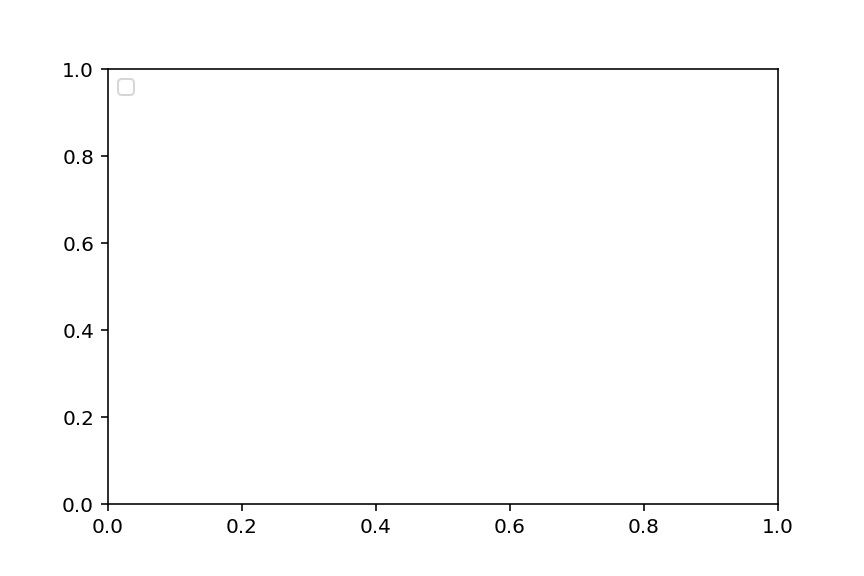

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


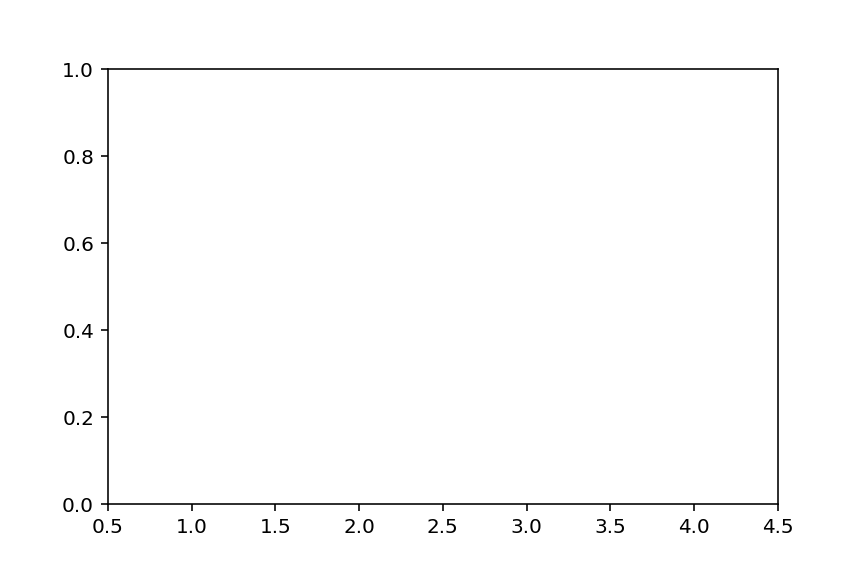

In [24]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


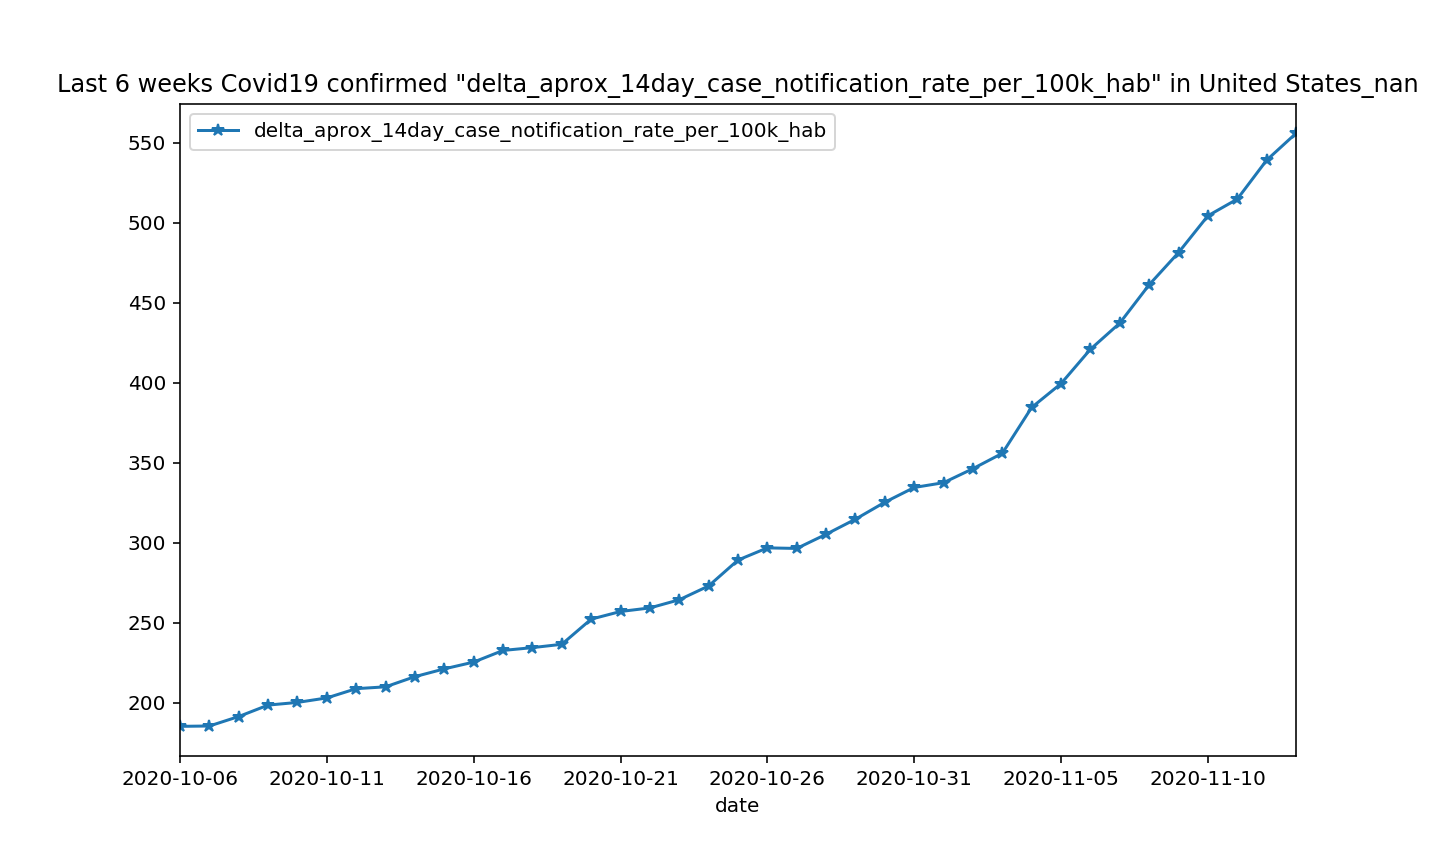

In [26]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


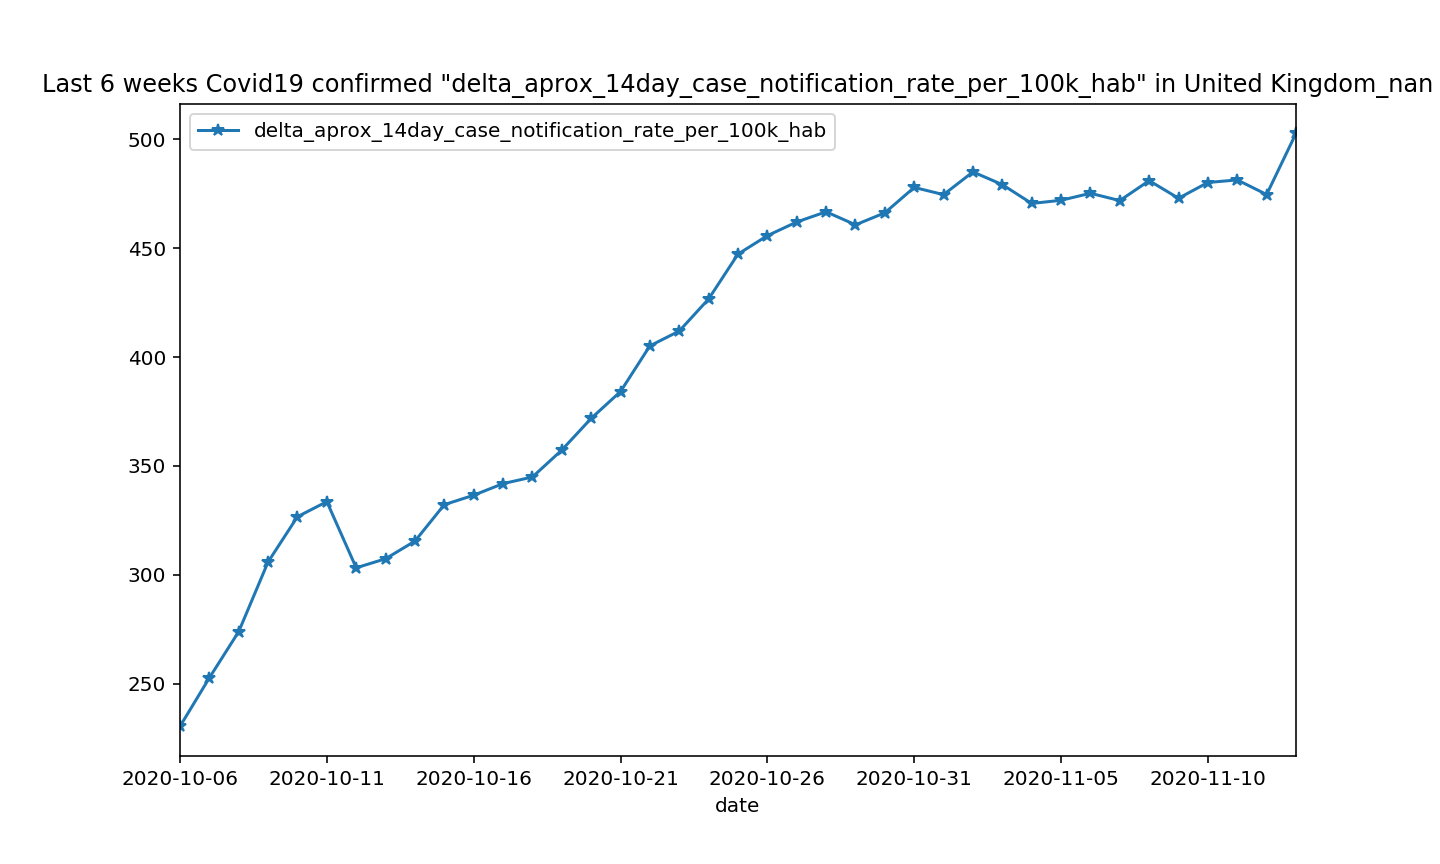

In [27]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


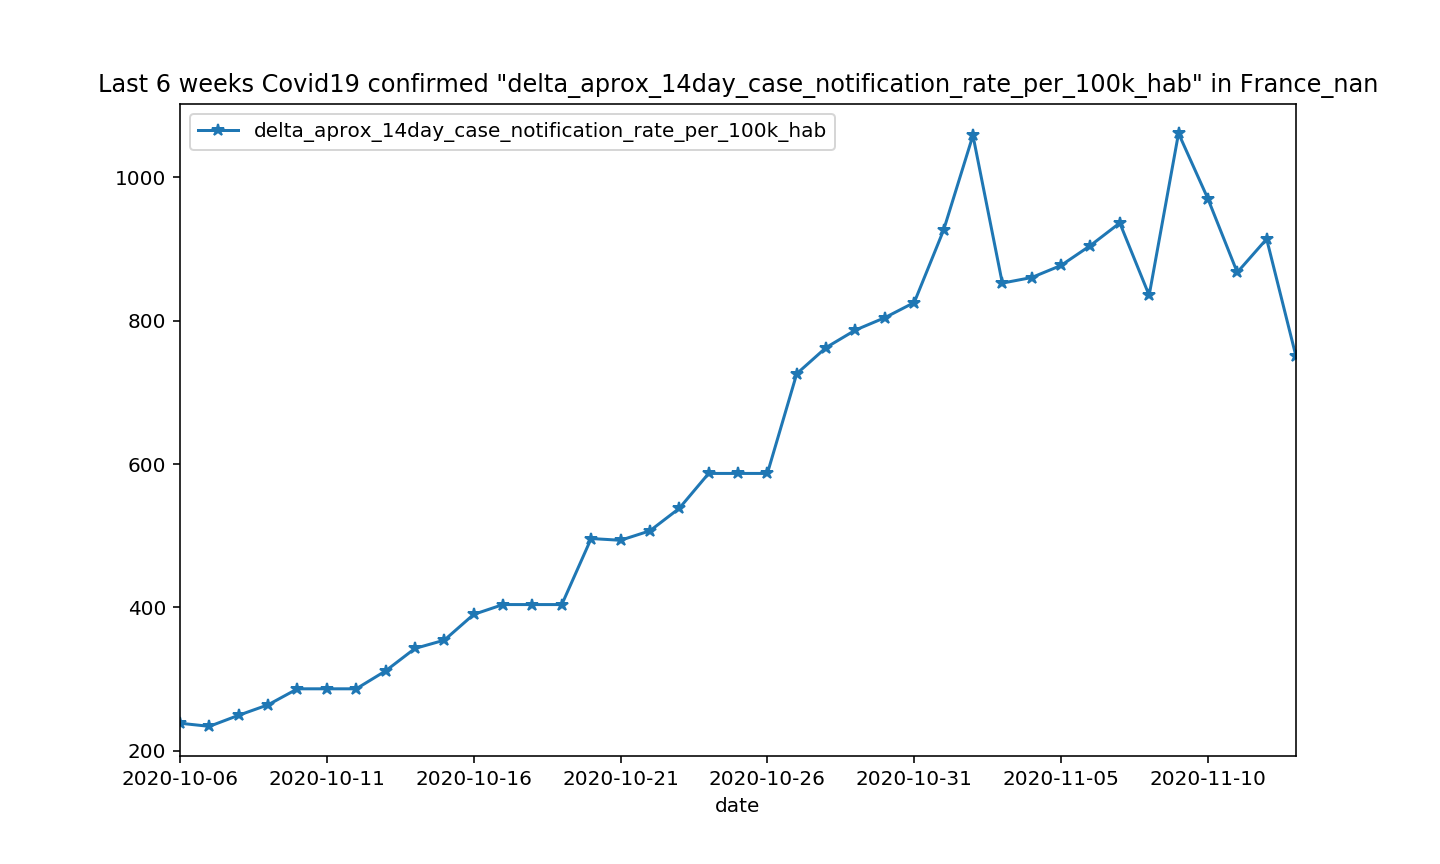

In [28]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


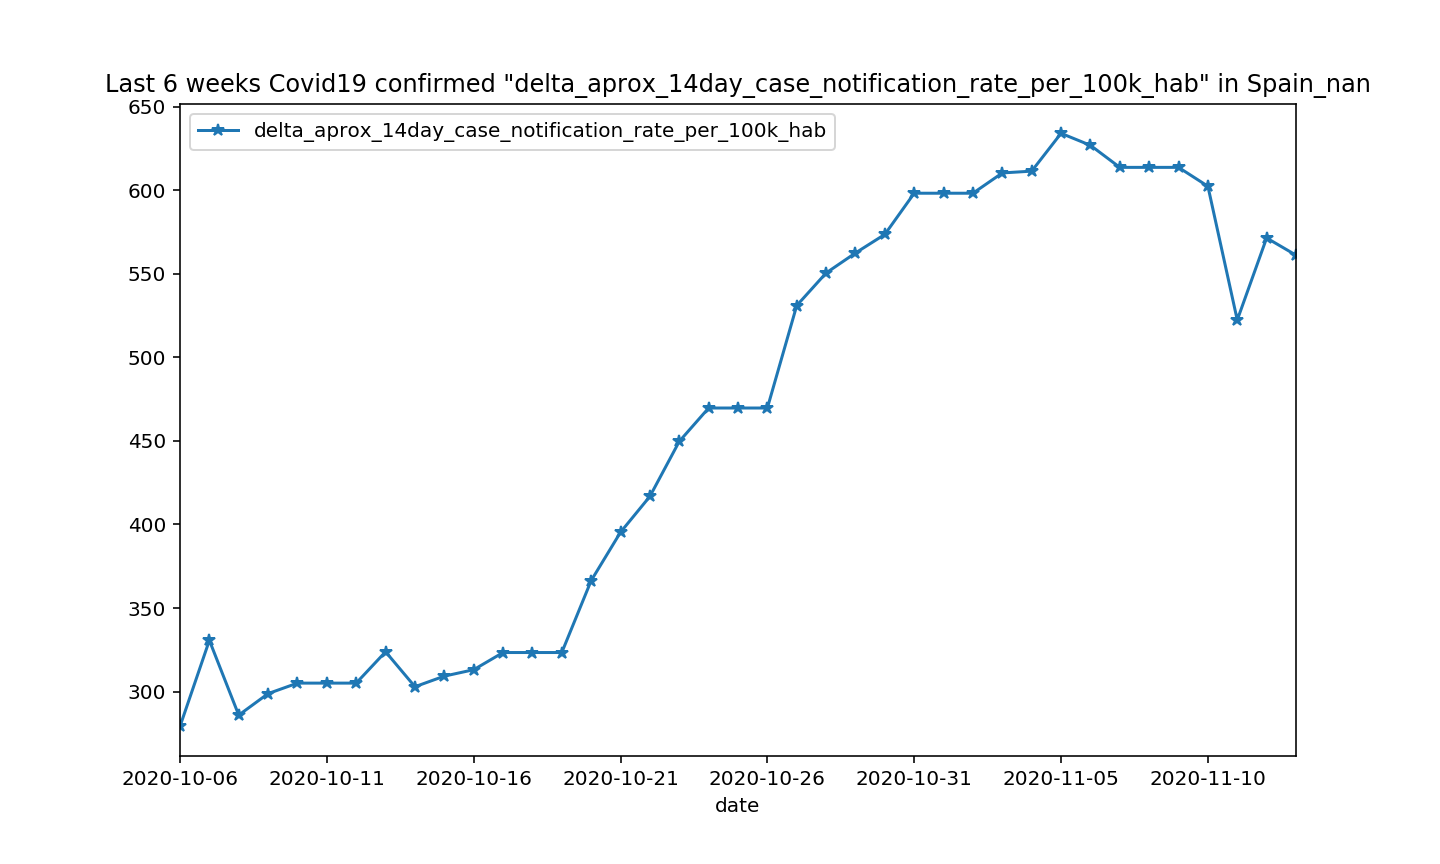

In [29]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


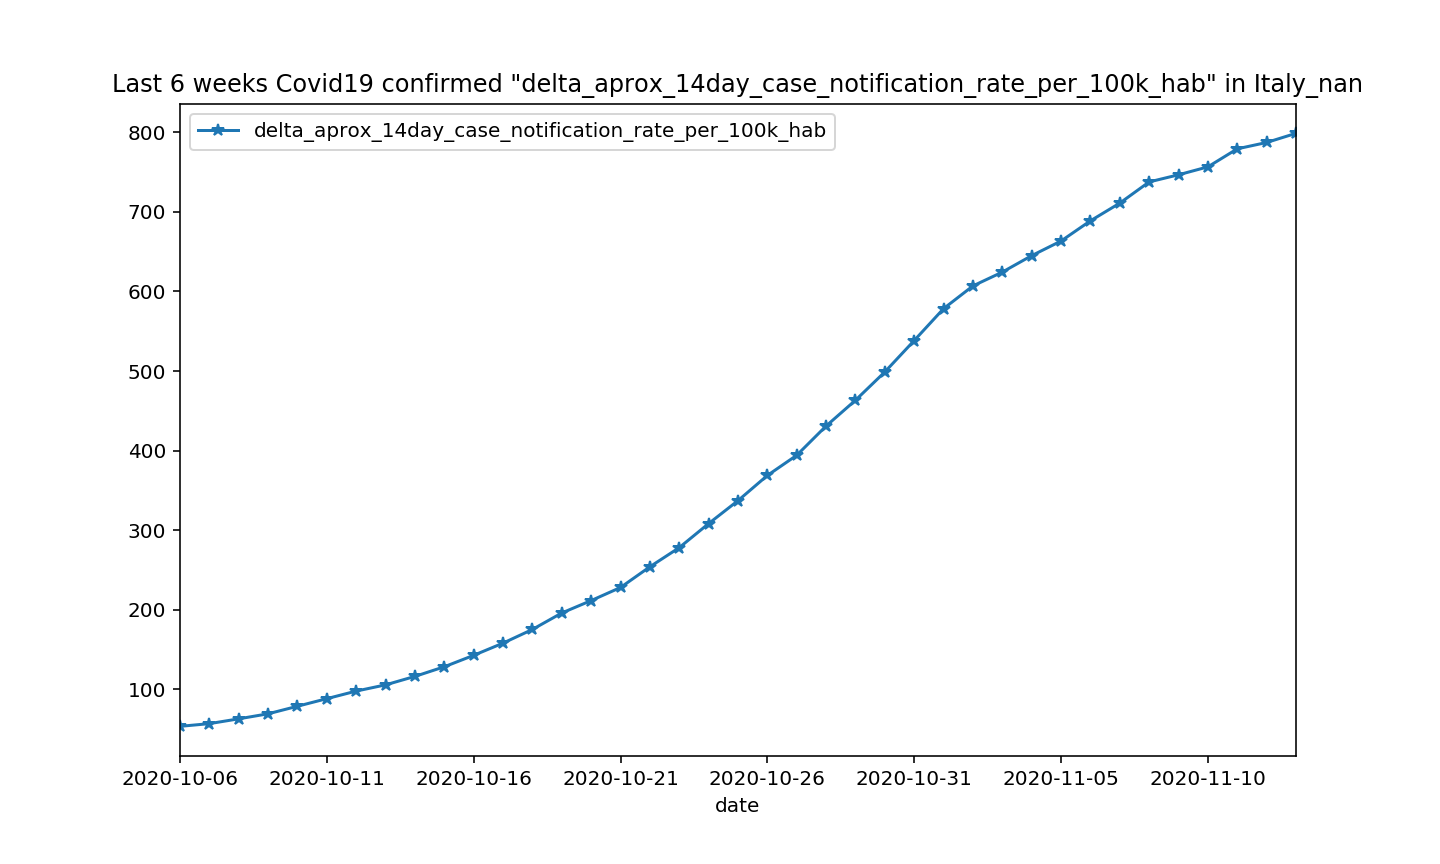

In [30]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


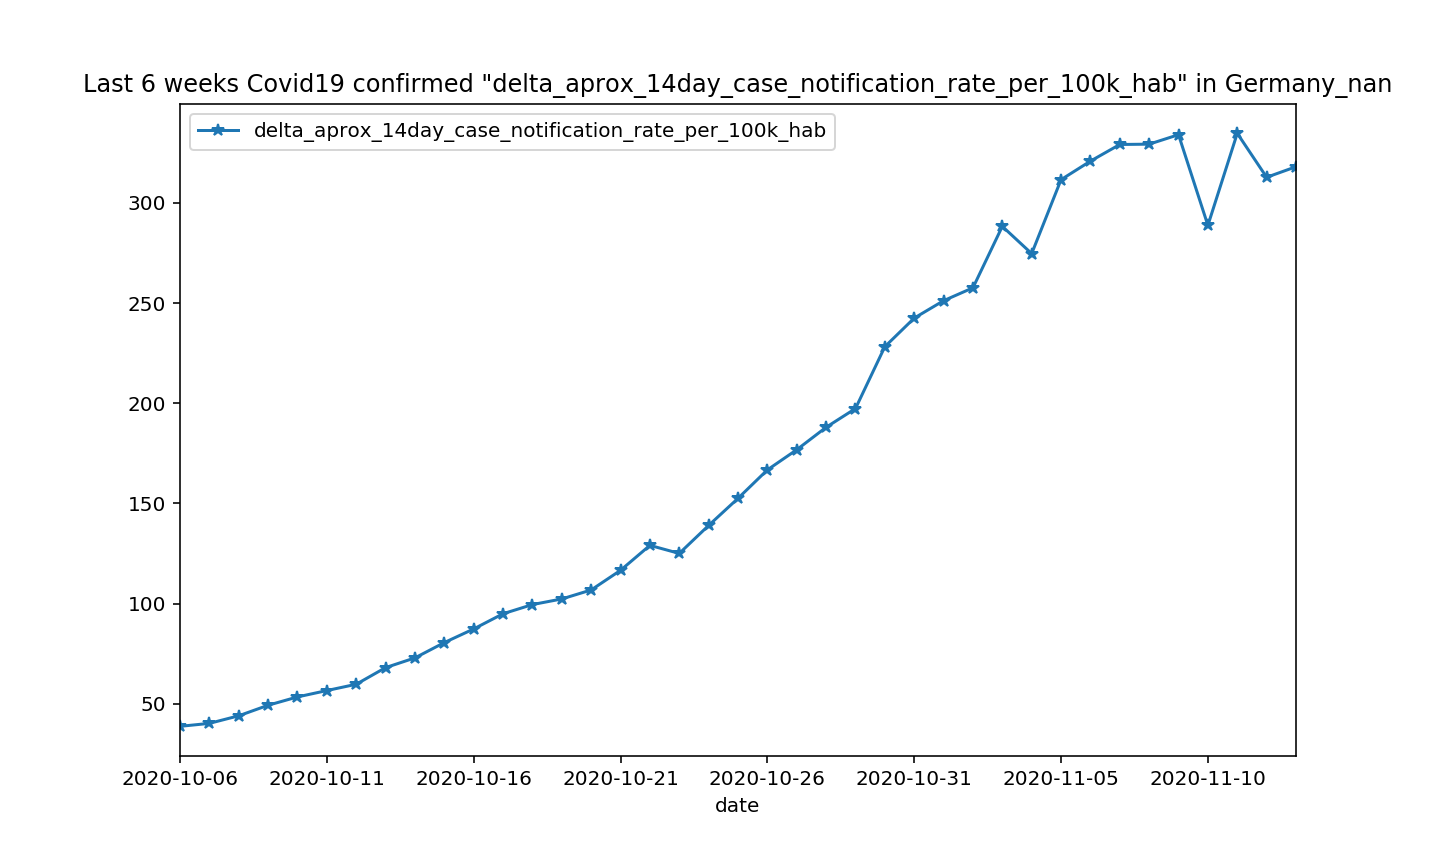

In [31]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


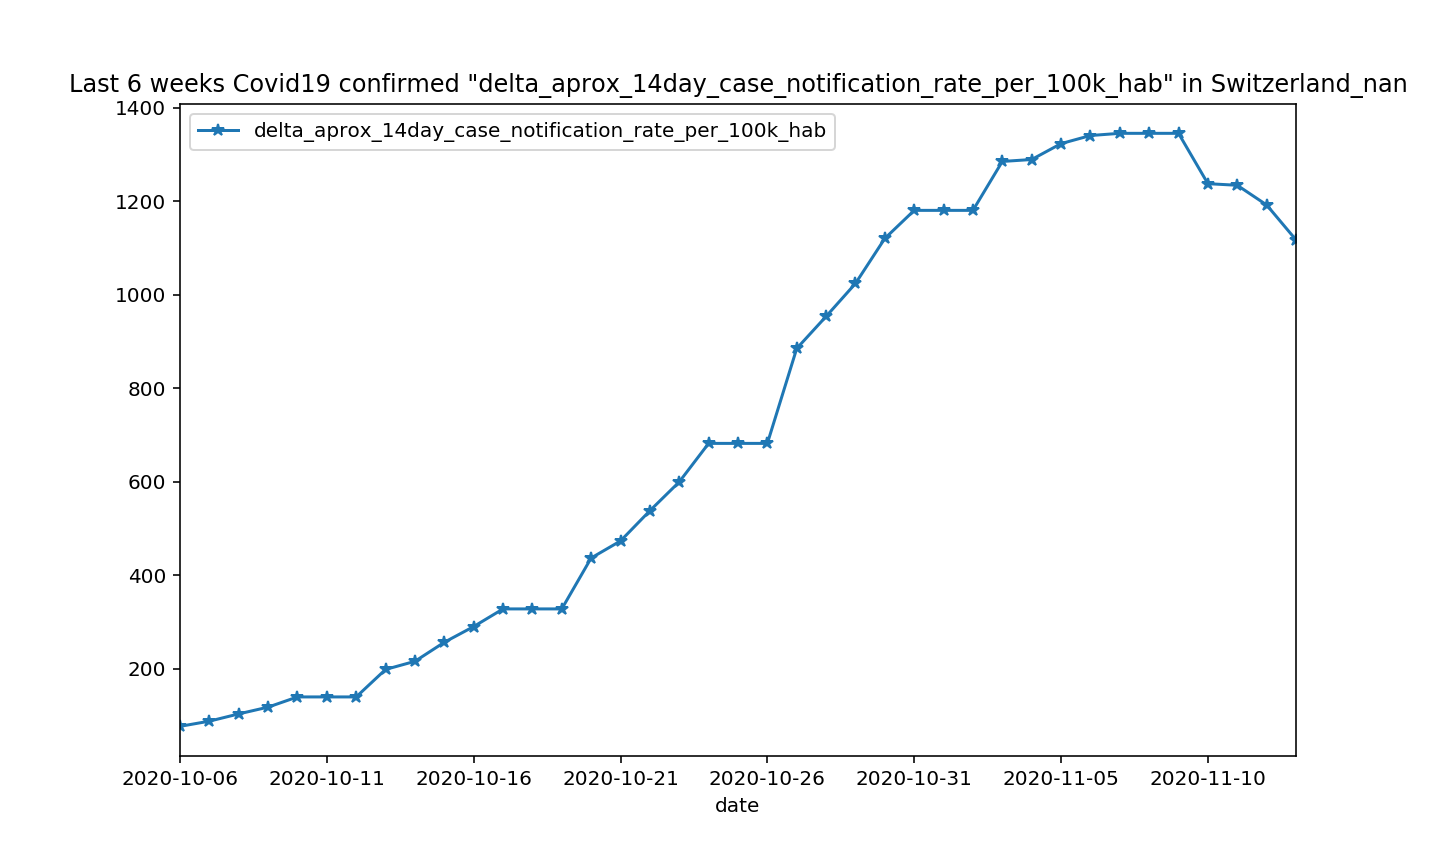

In [32]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


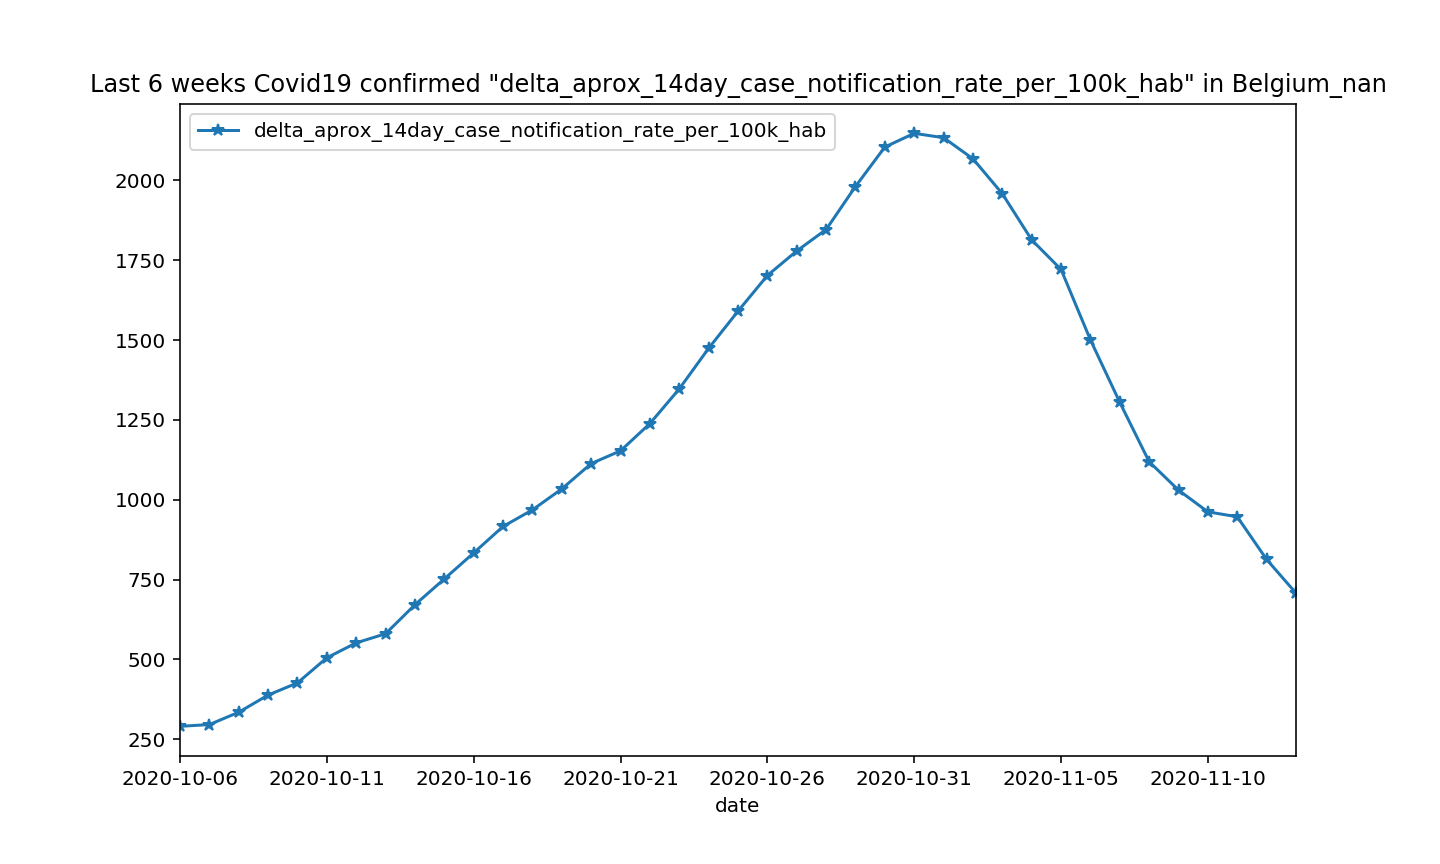

In [33]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


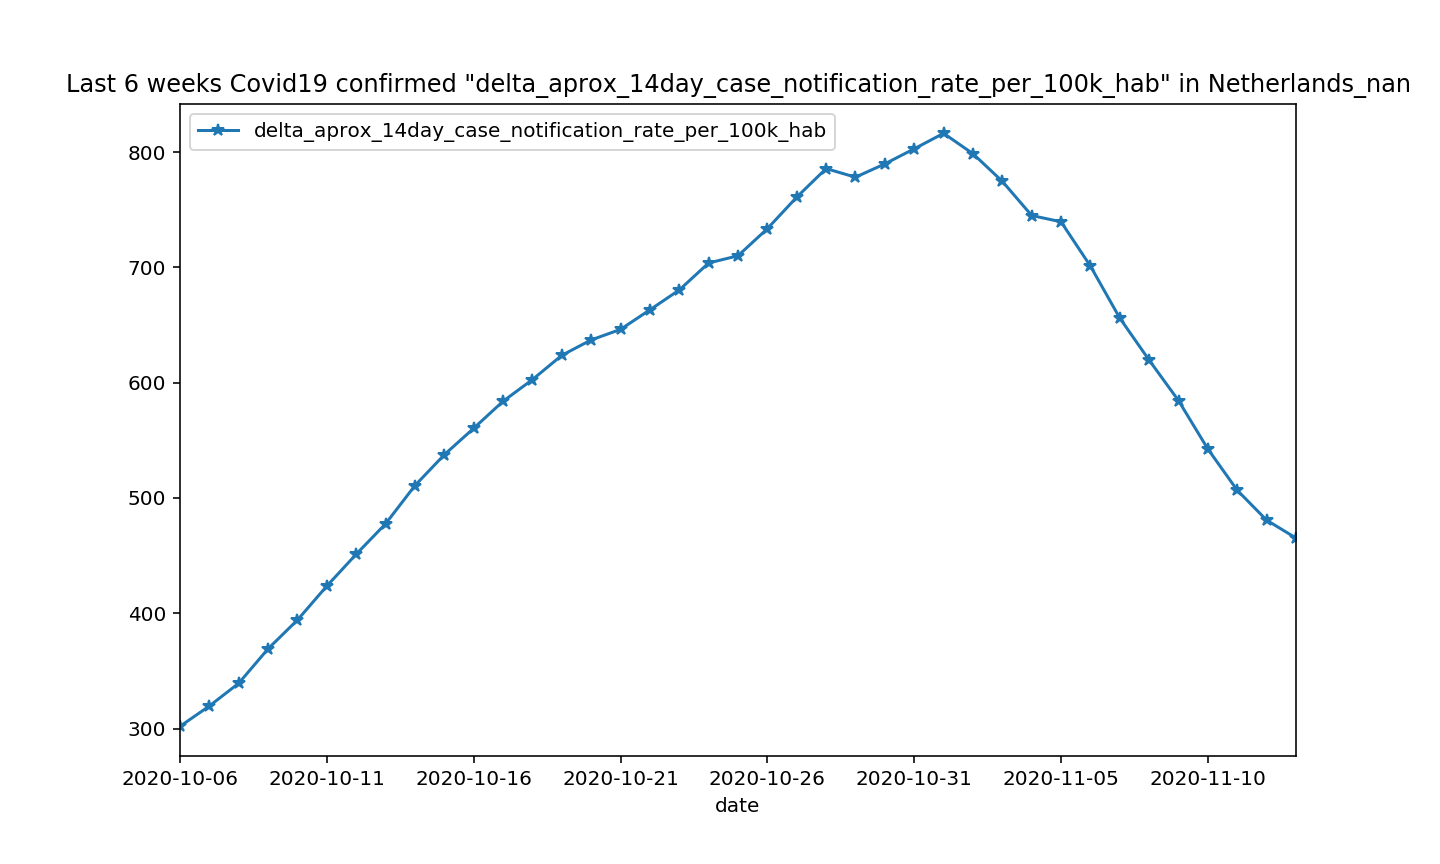

In [34]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


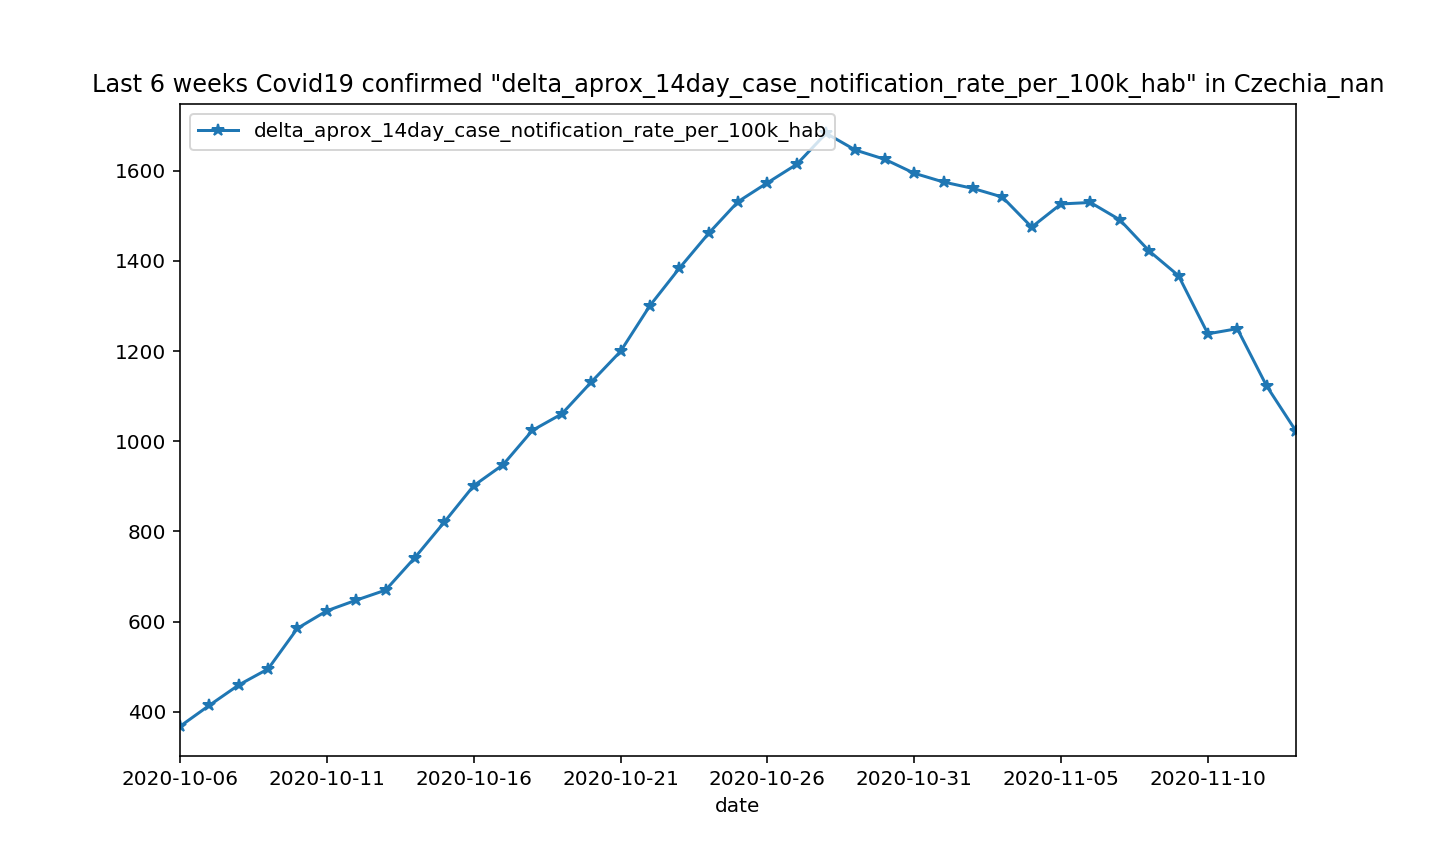

In [35]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


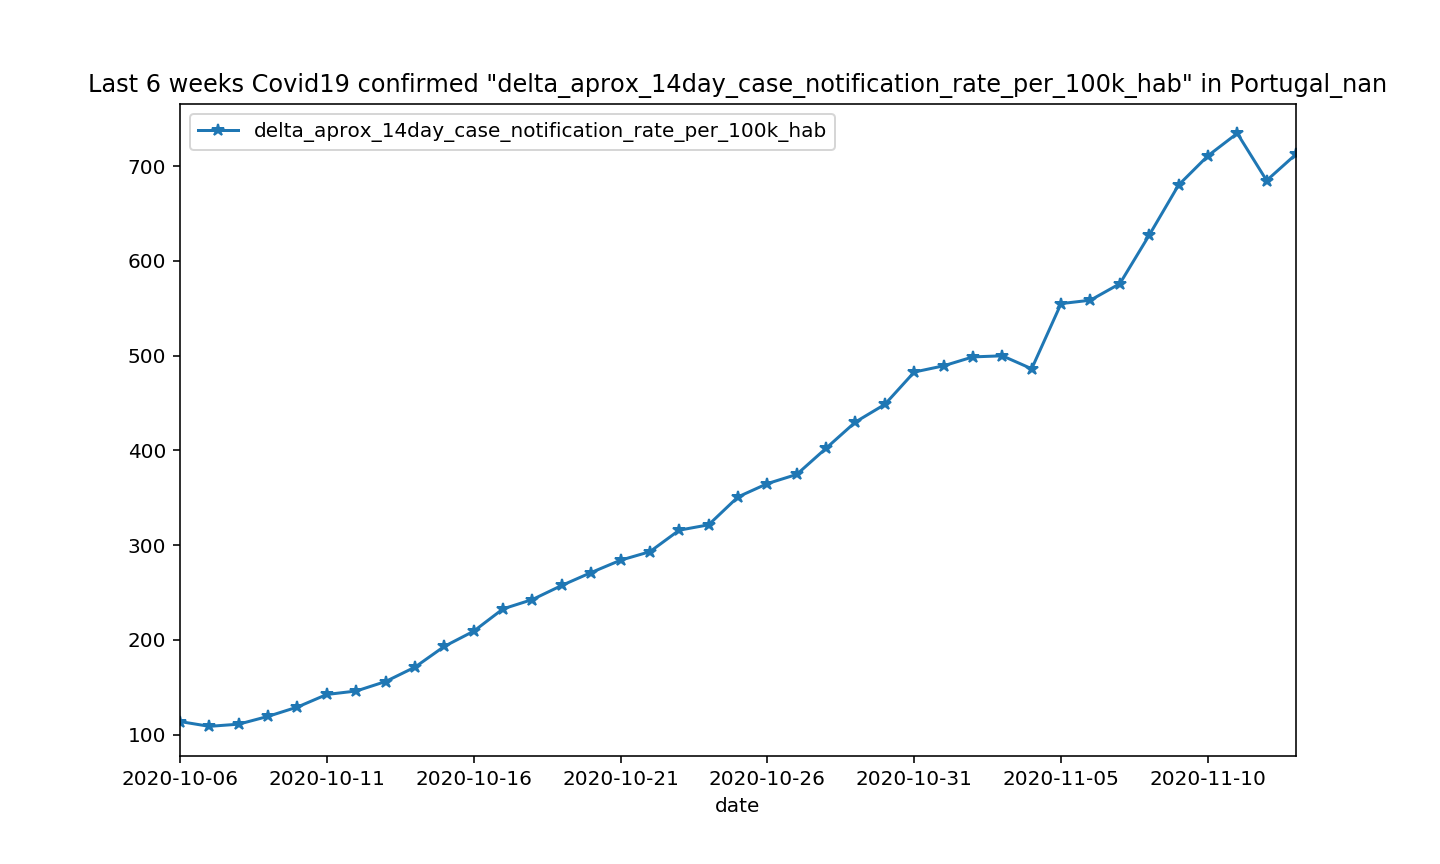

In [36]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [37]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


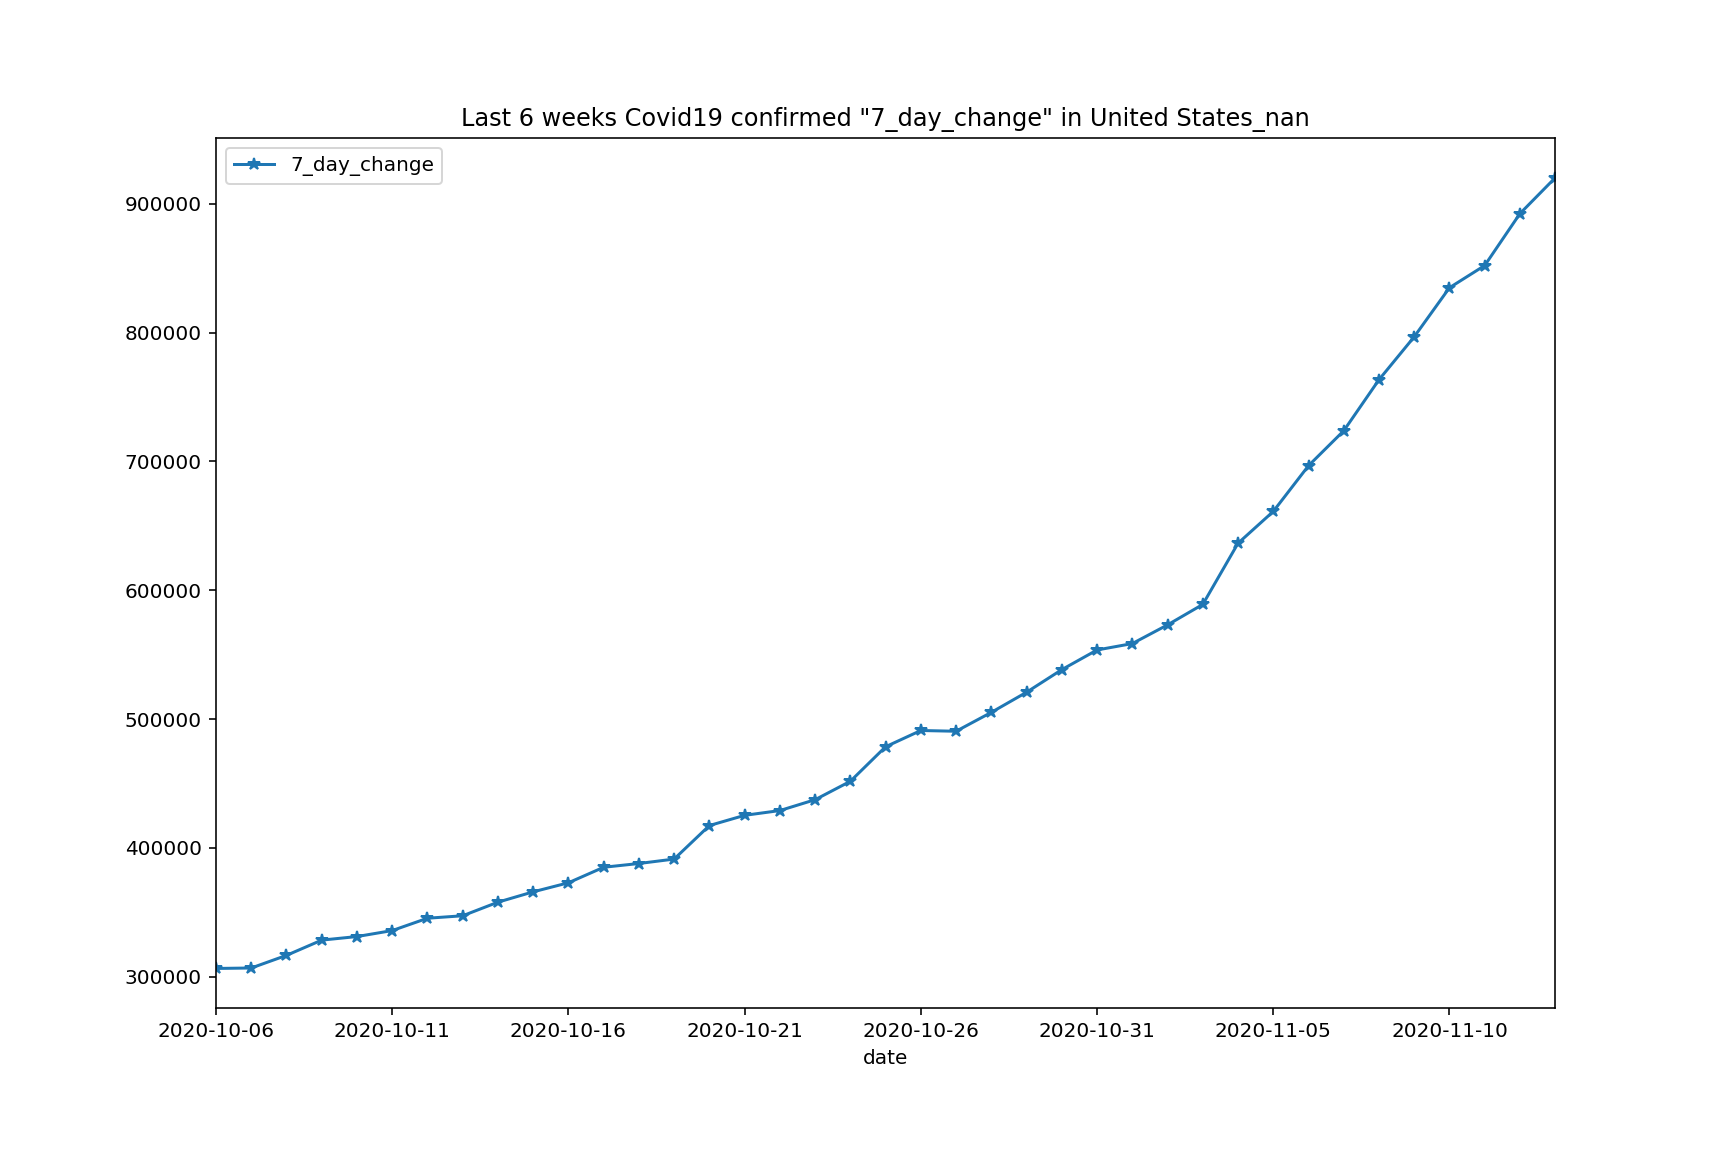

In [38]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


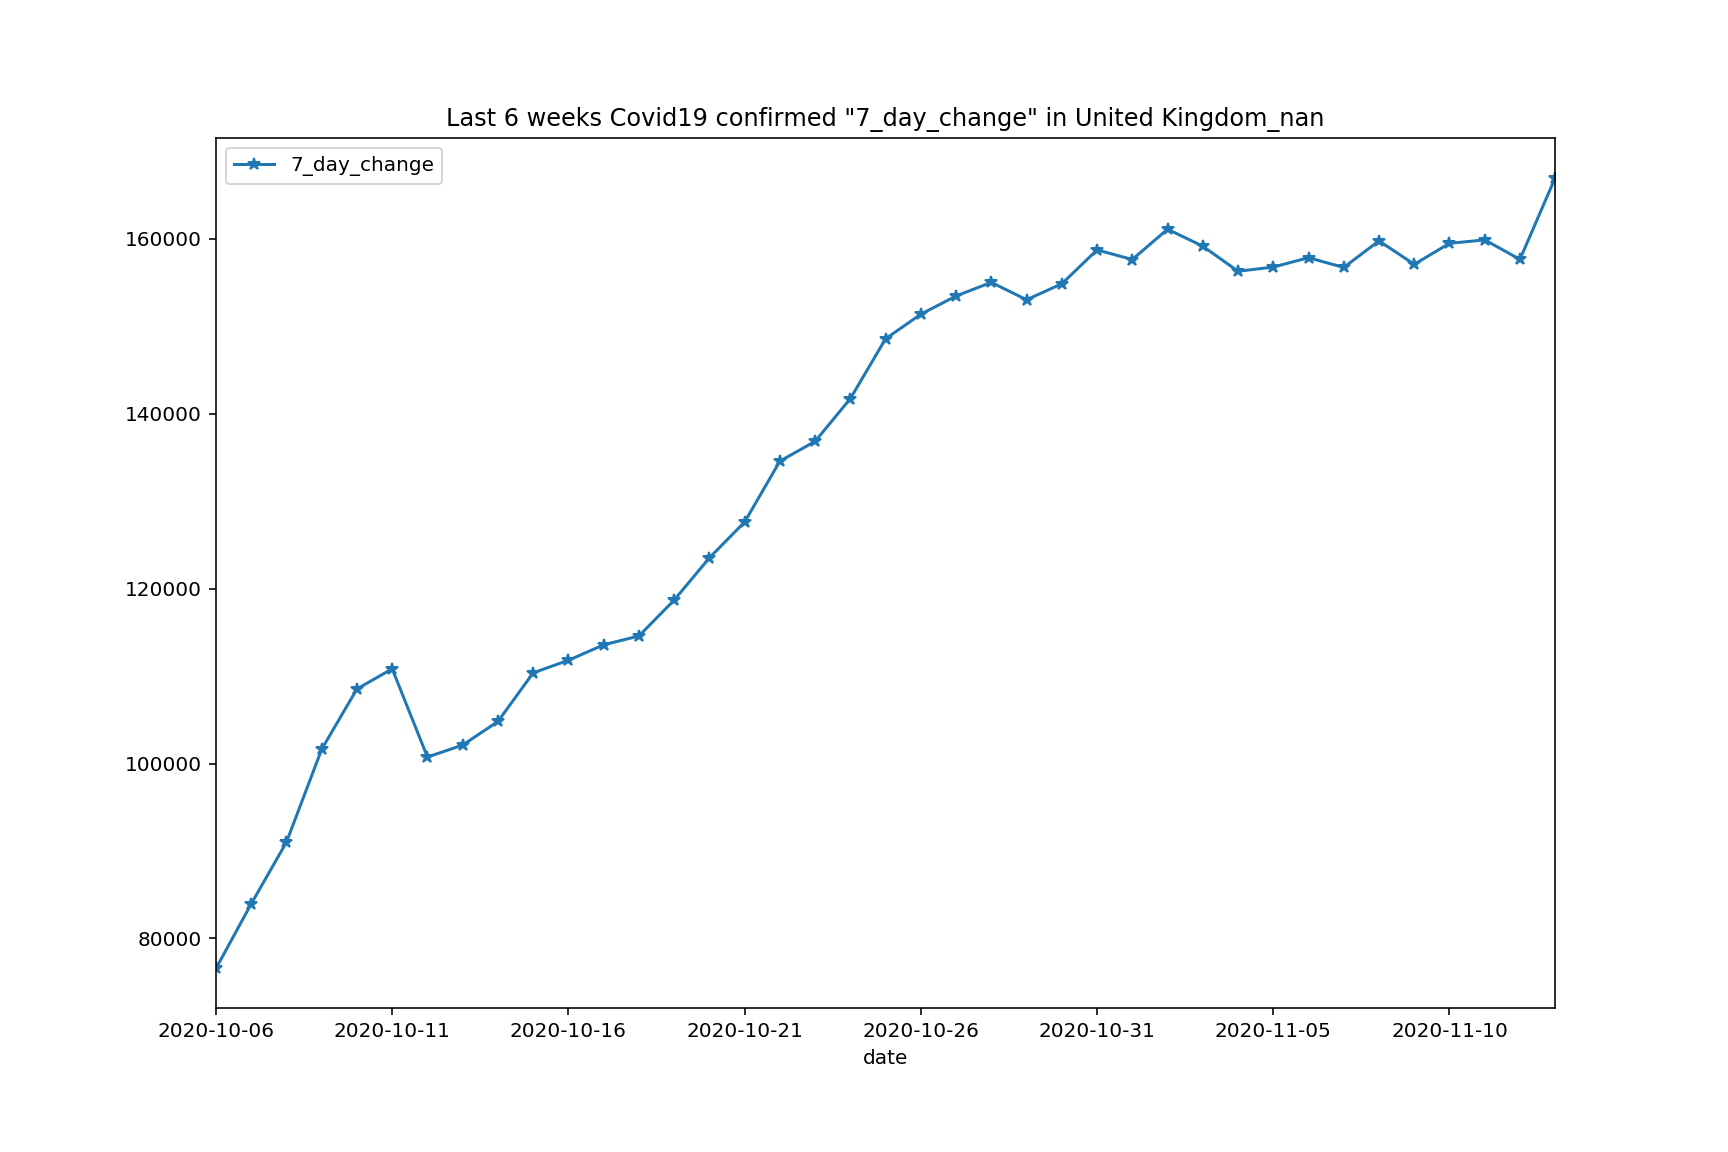

In [39]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


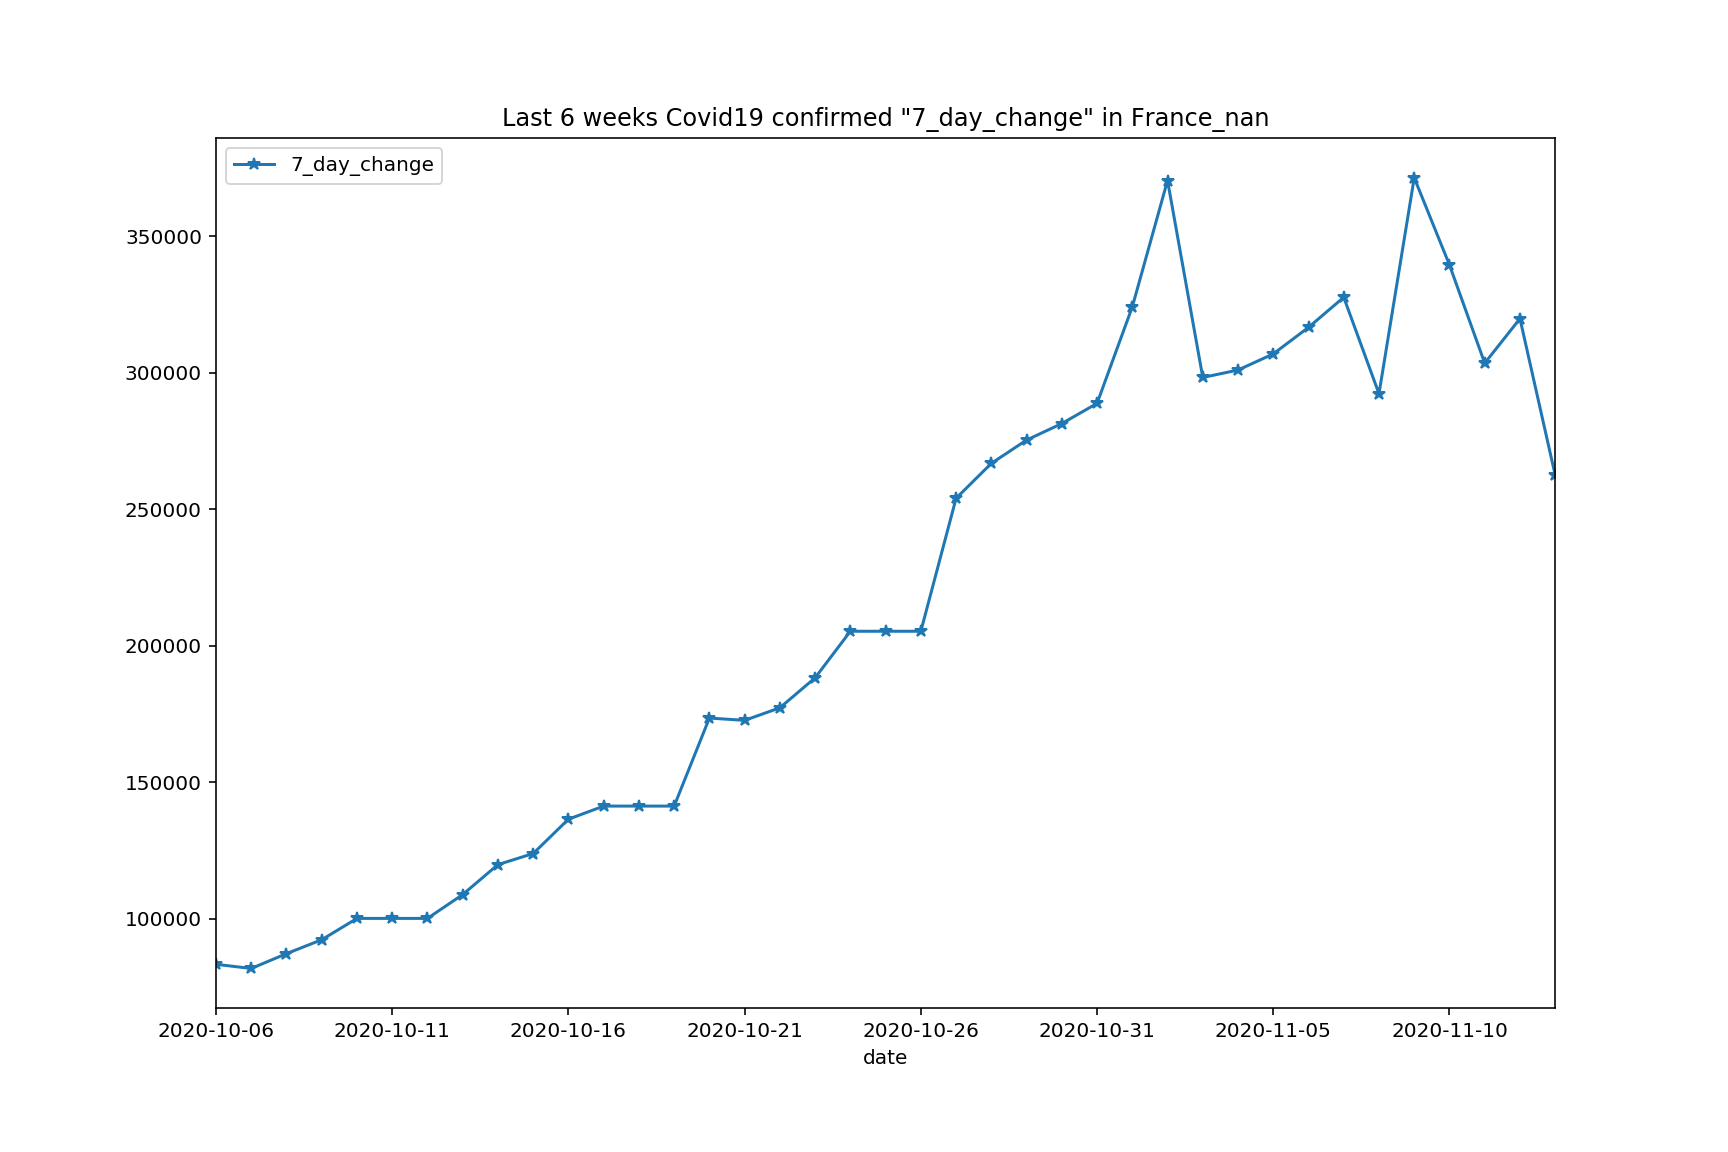

In [40]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


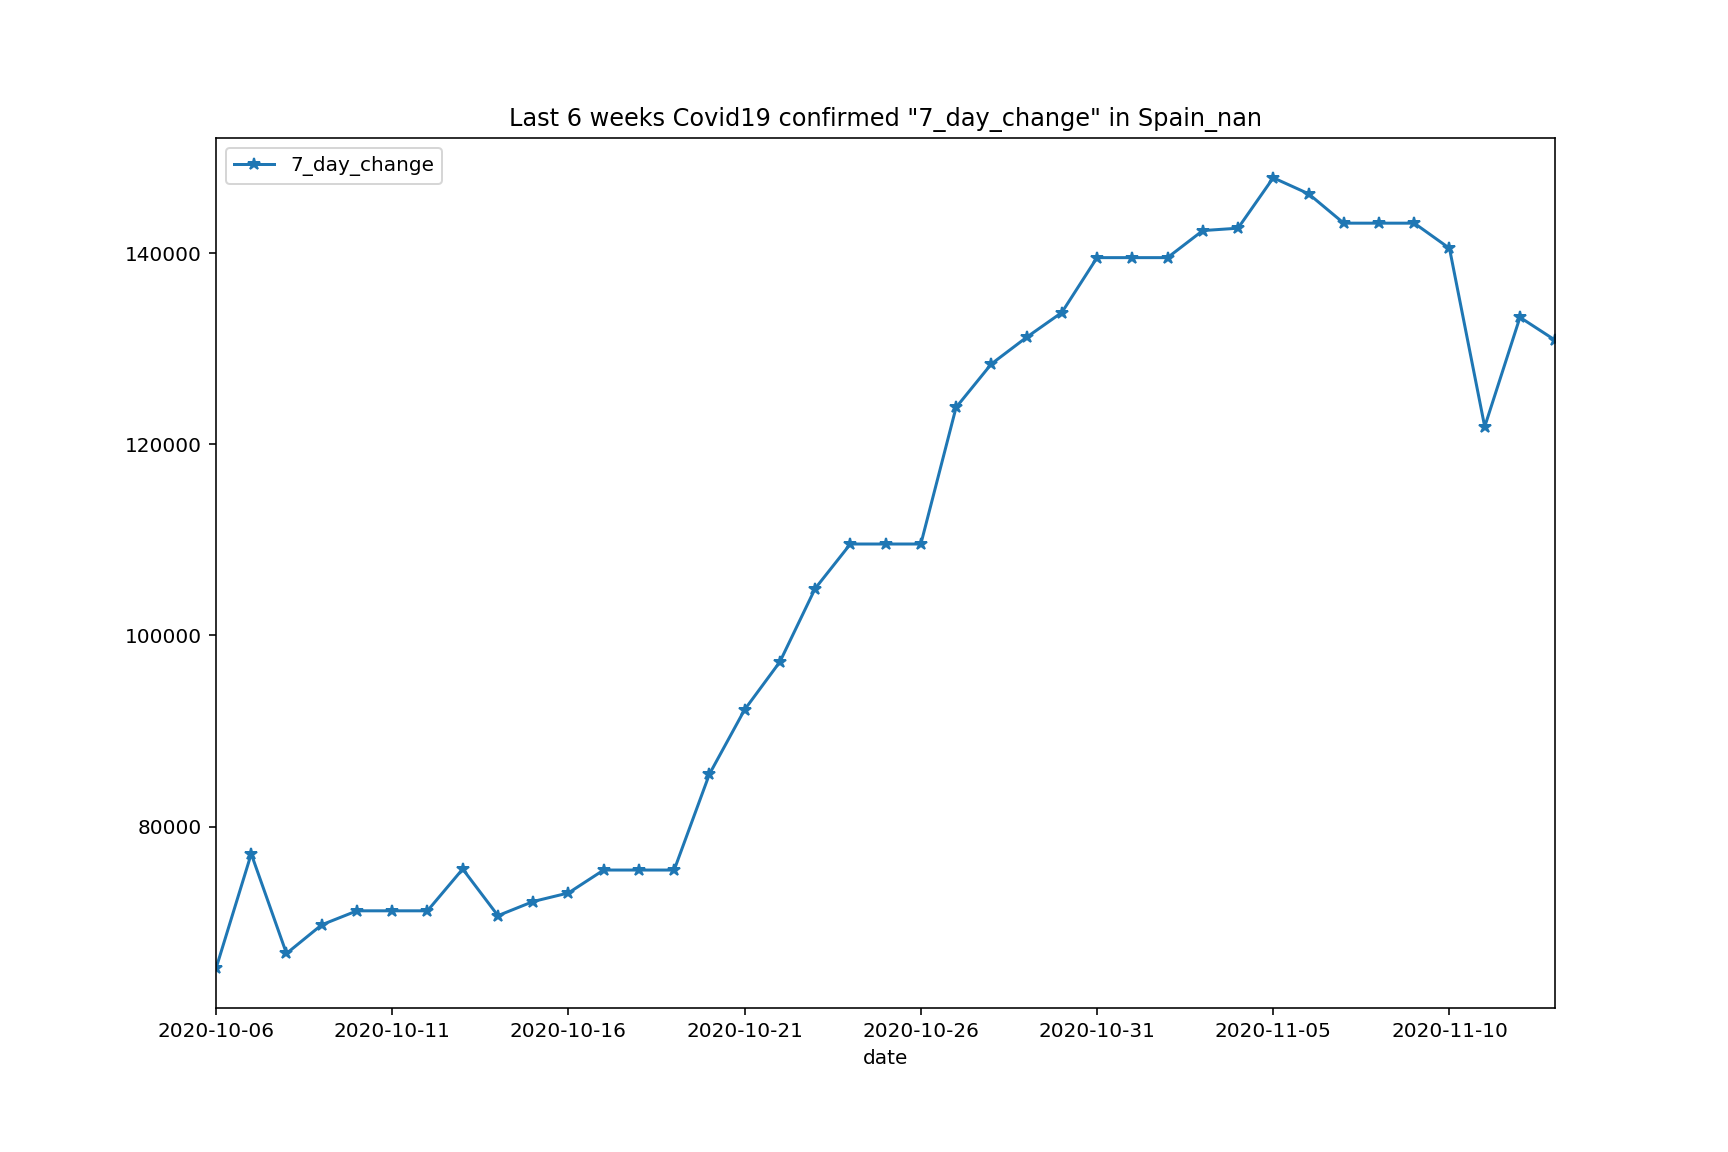

In [41]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


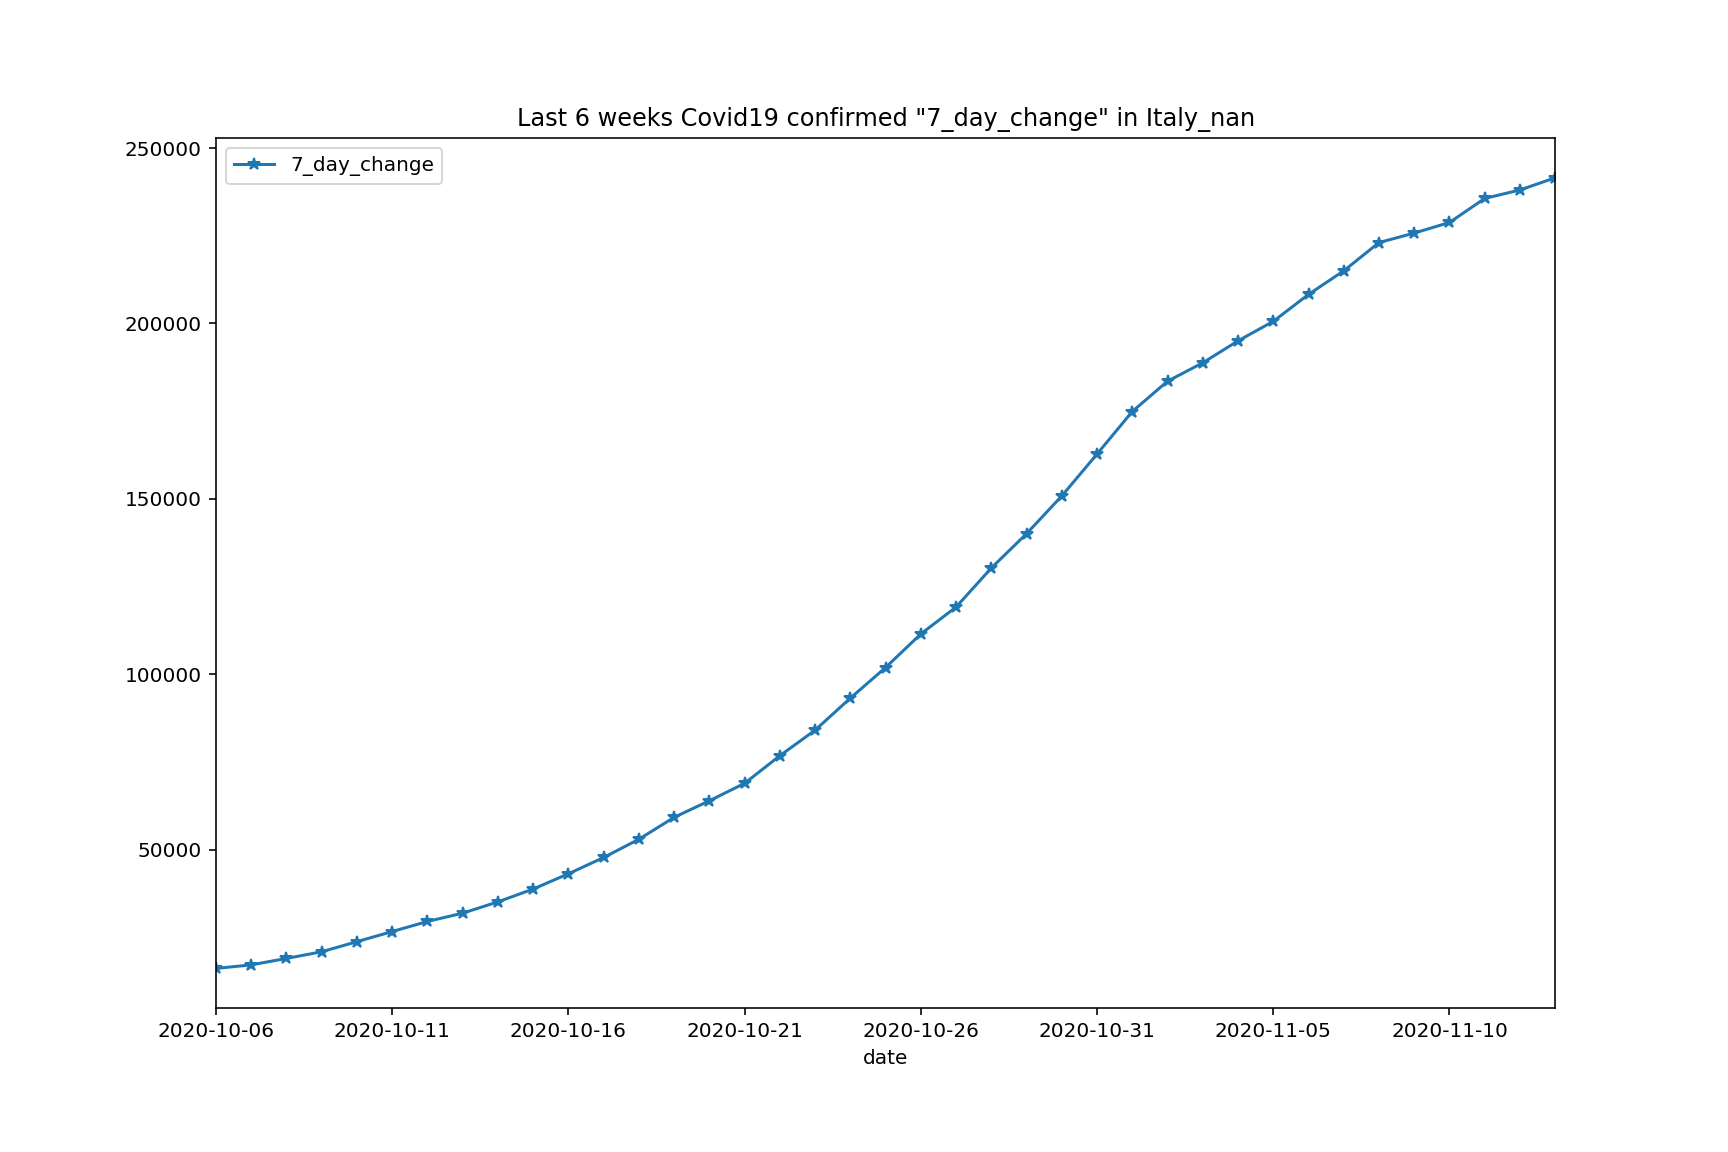

In [42]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


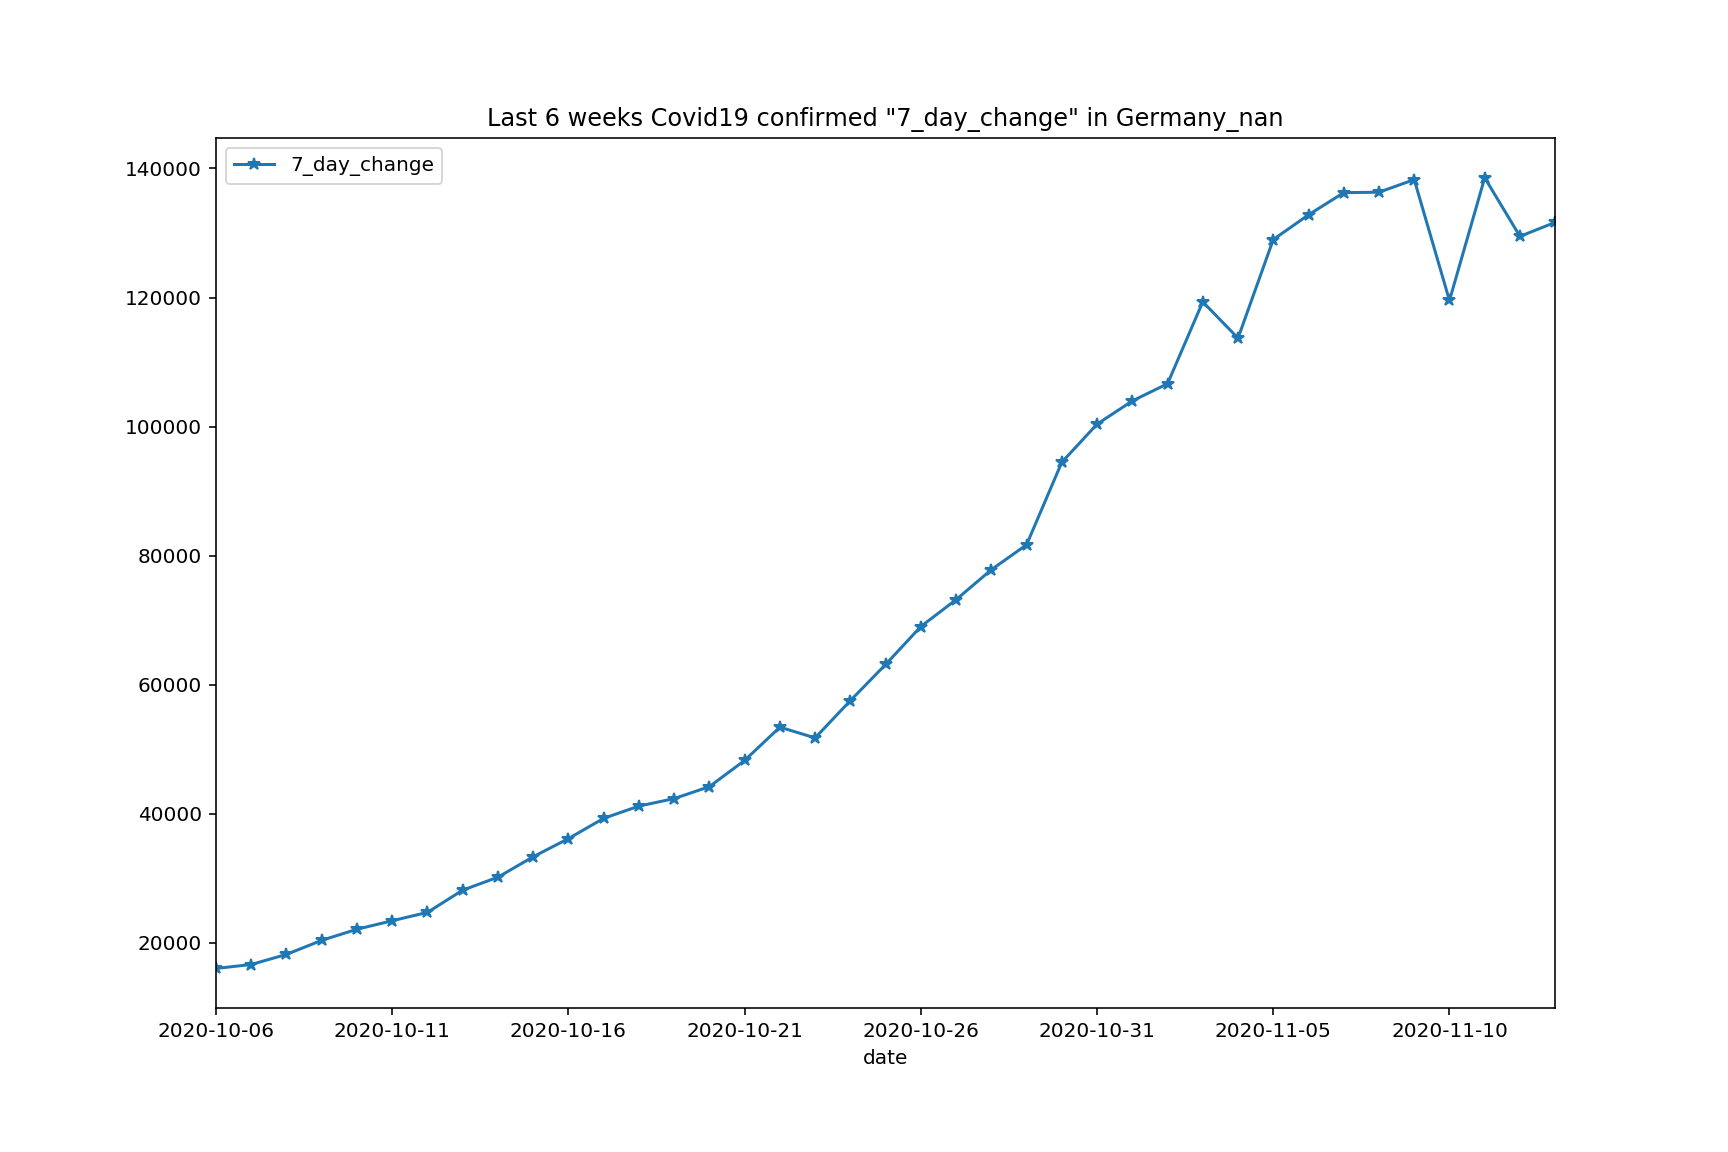

In [43]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


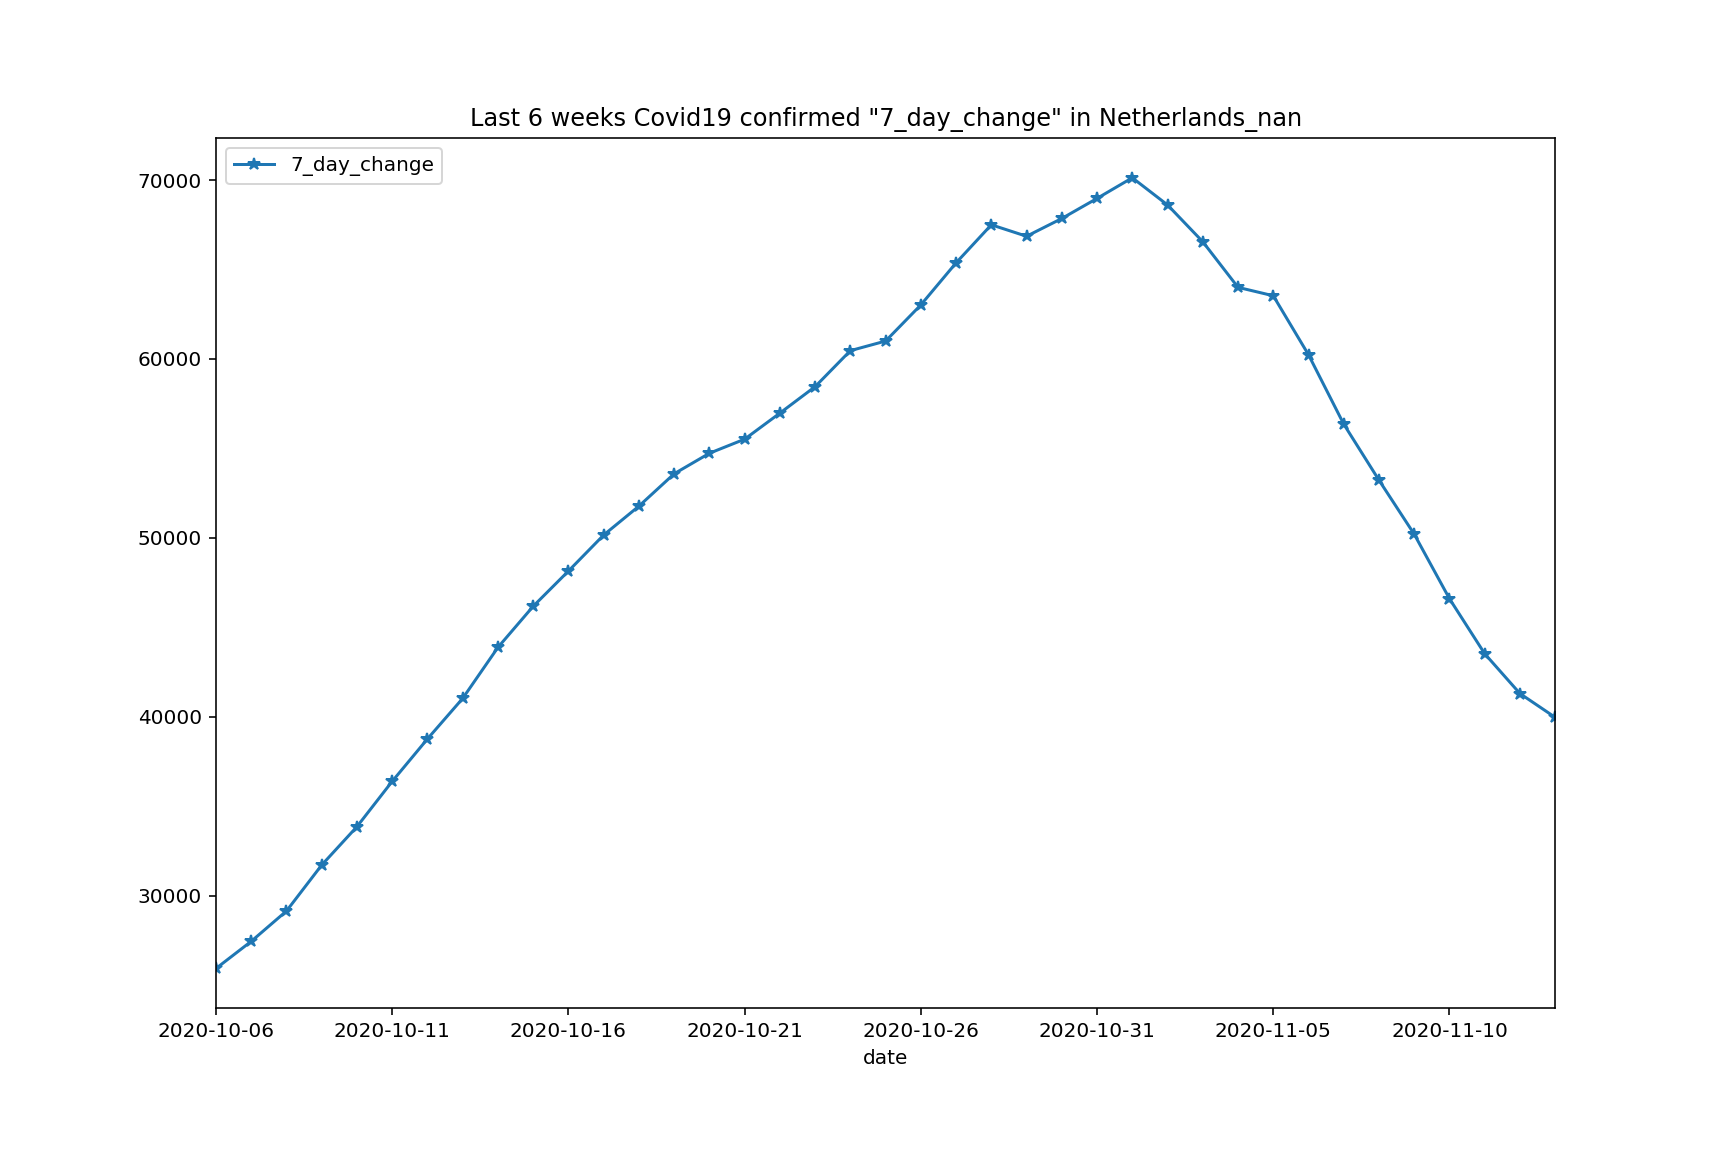

In [44]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


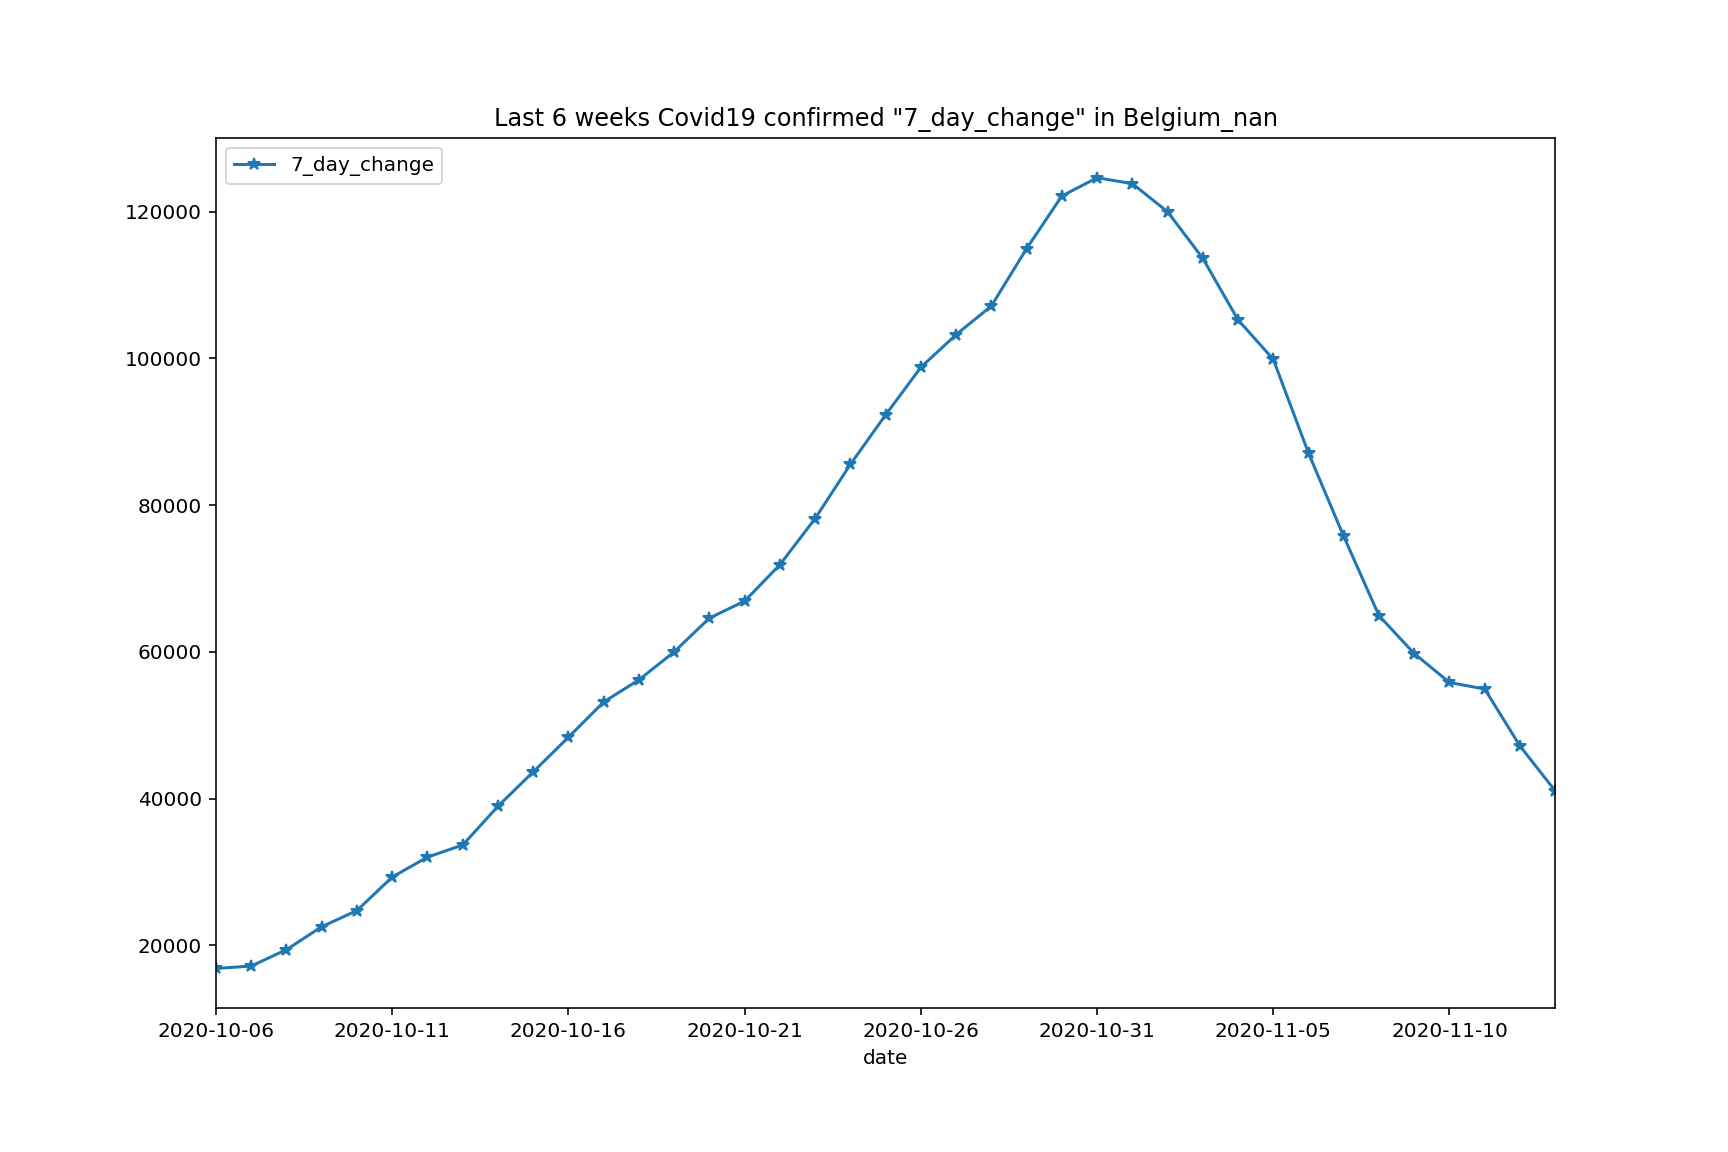

In [45]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


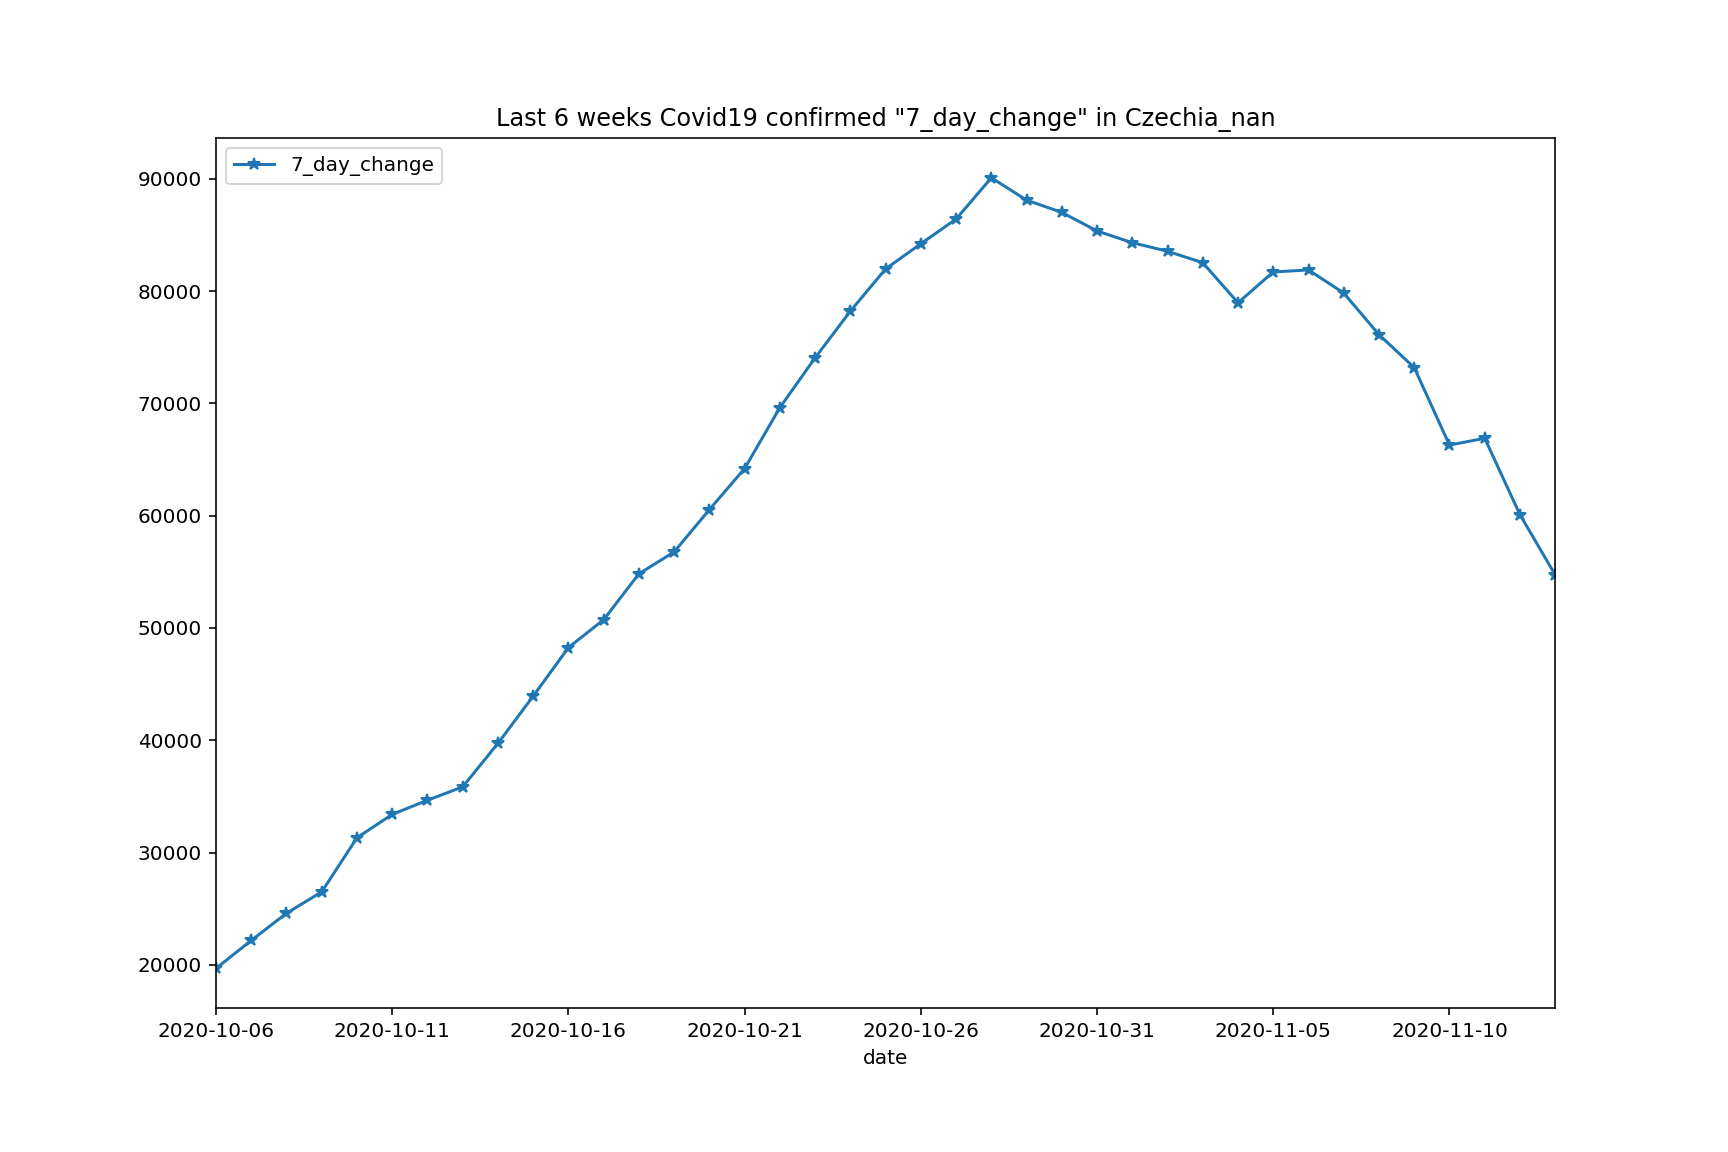

In [46]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


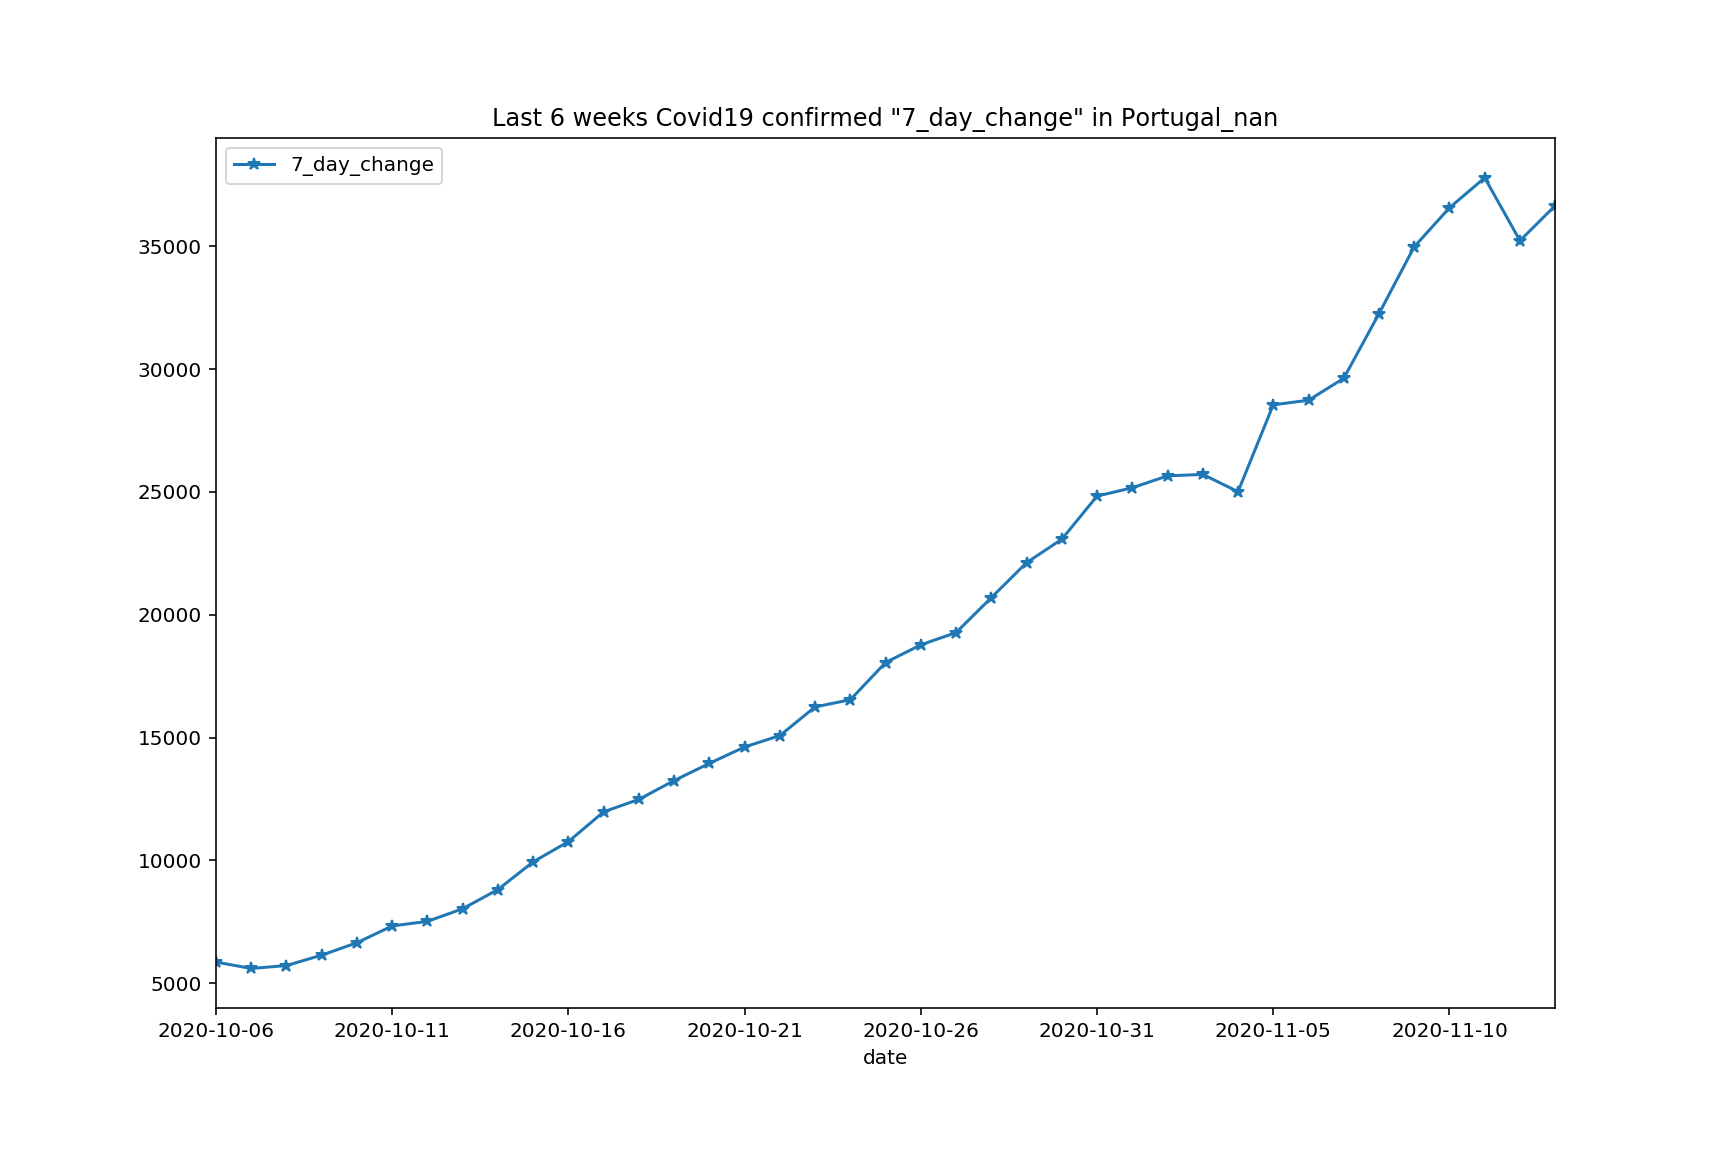

In [47]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [48]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


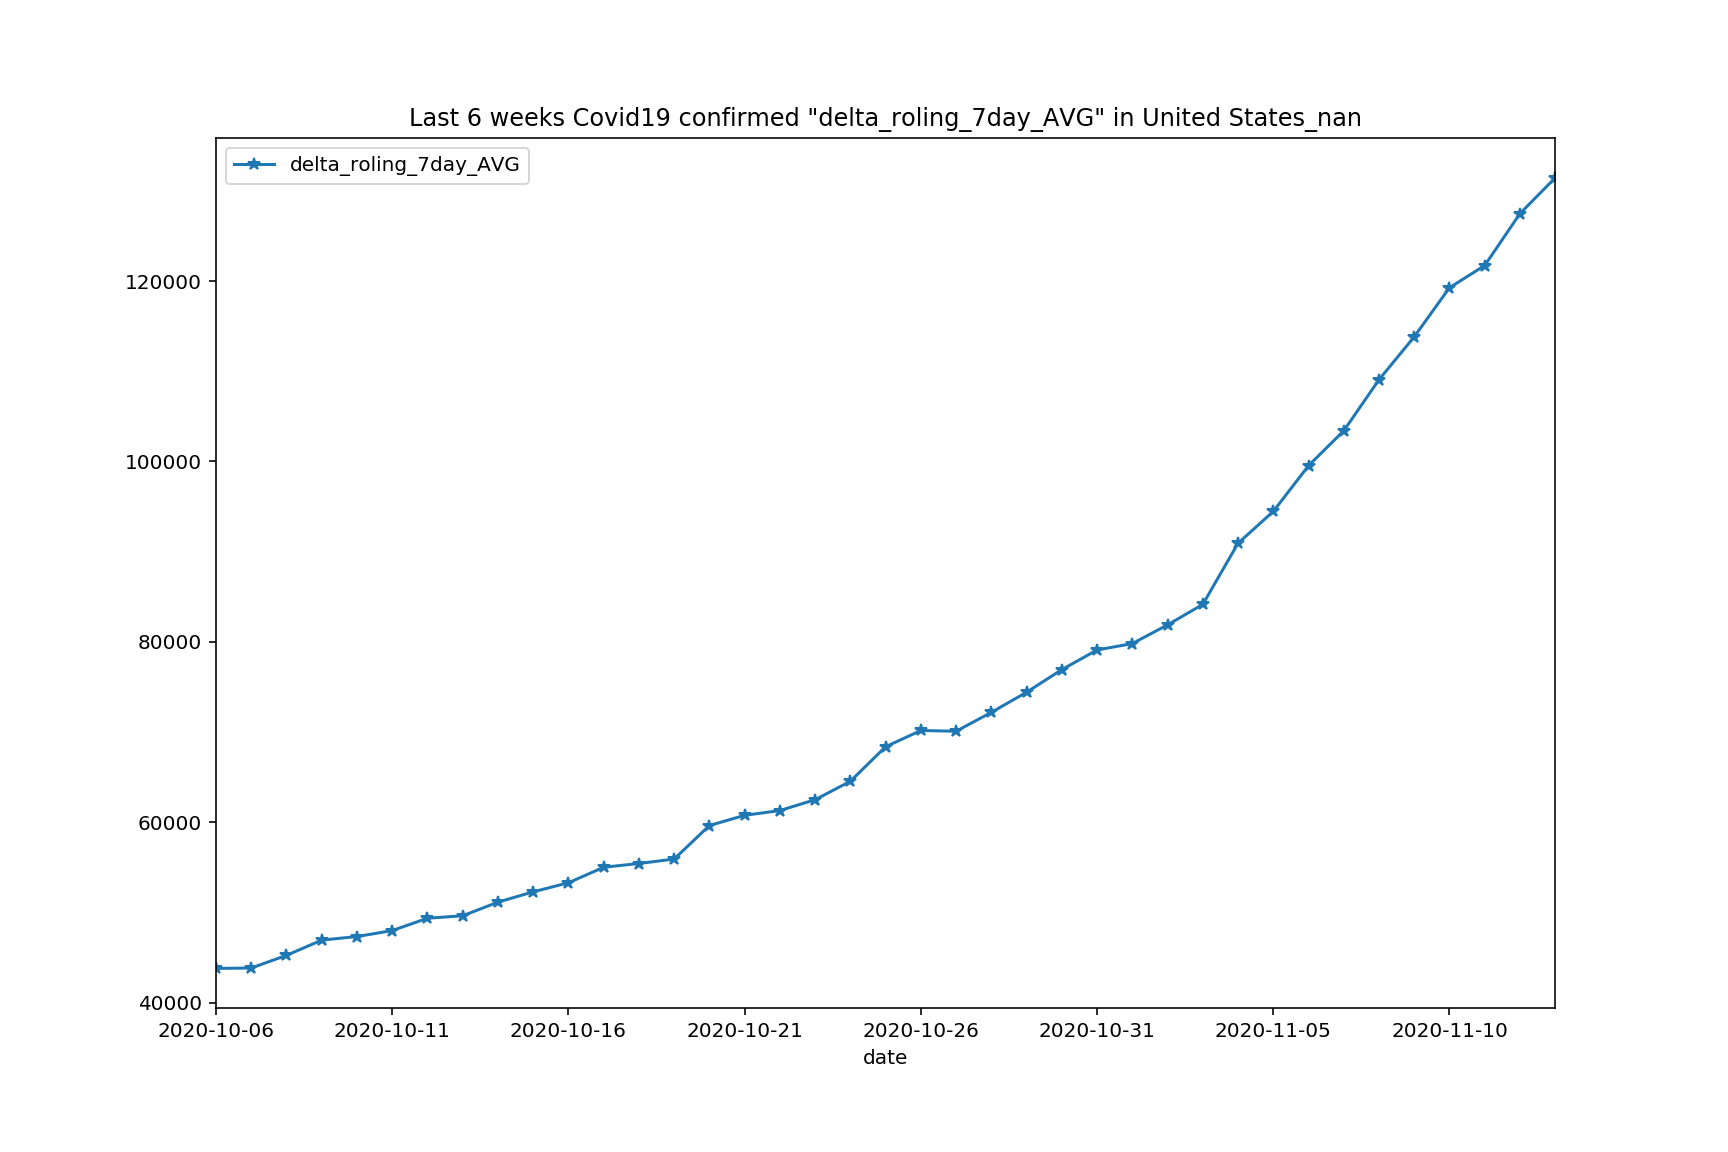

In [49]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


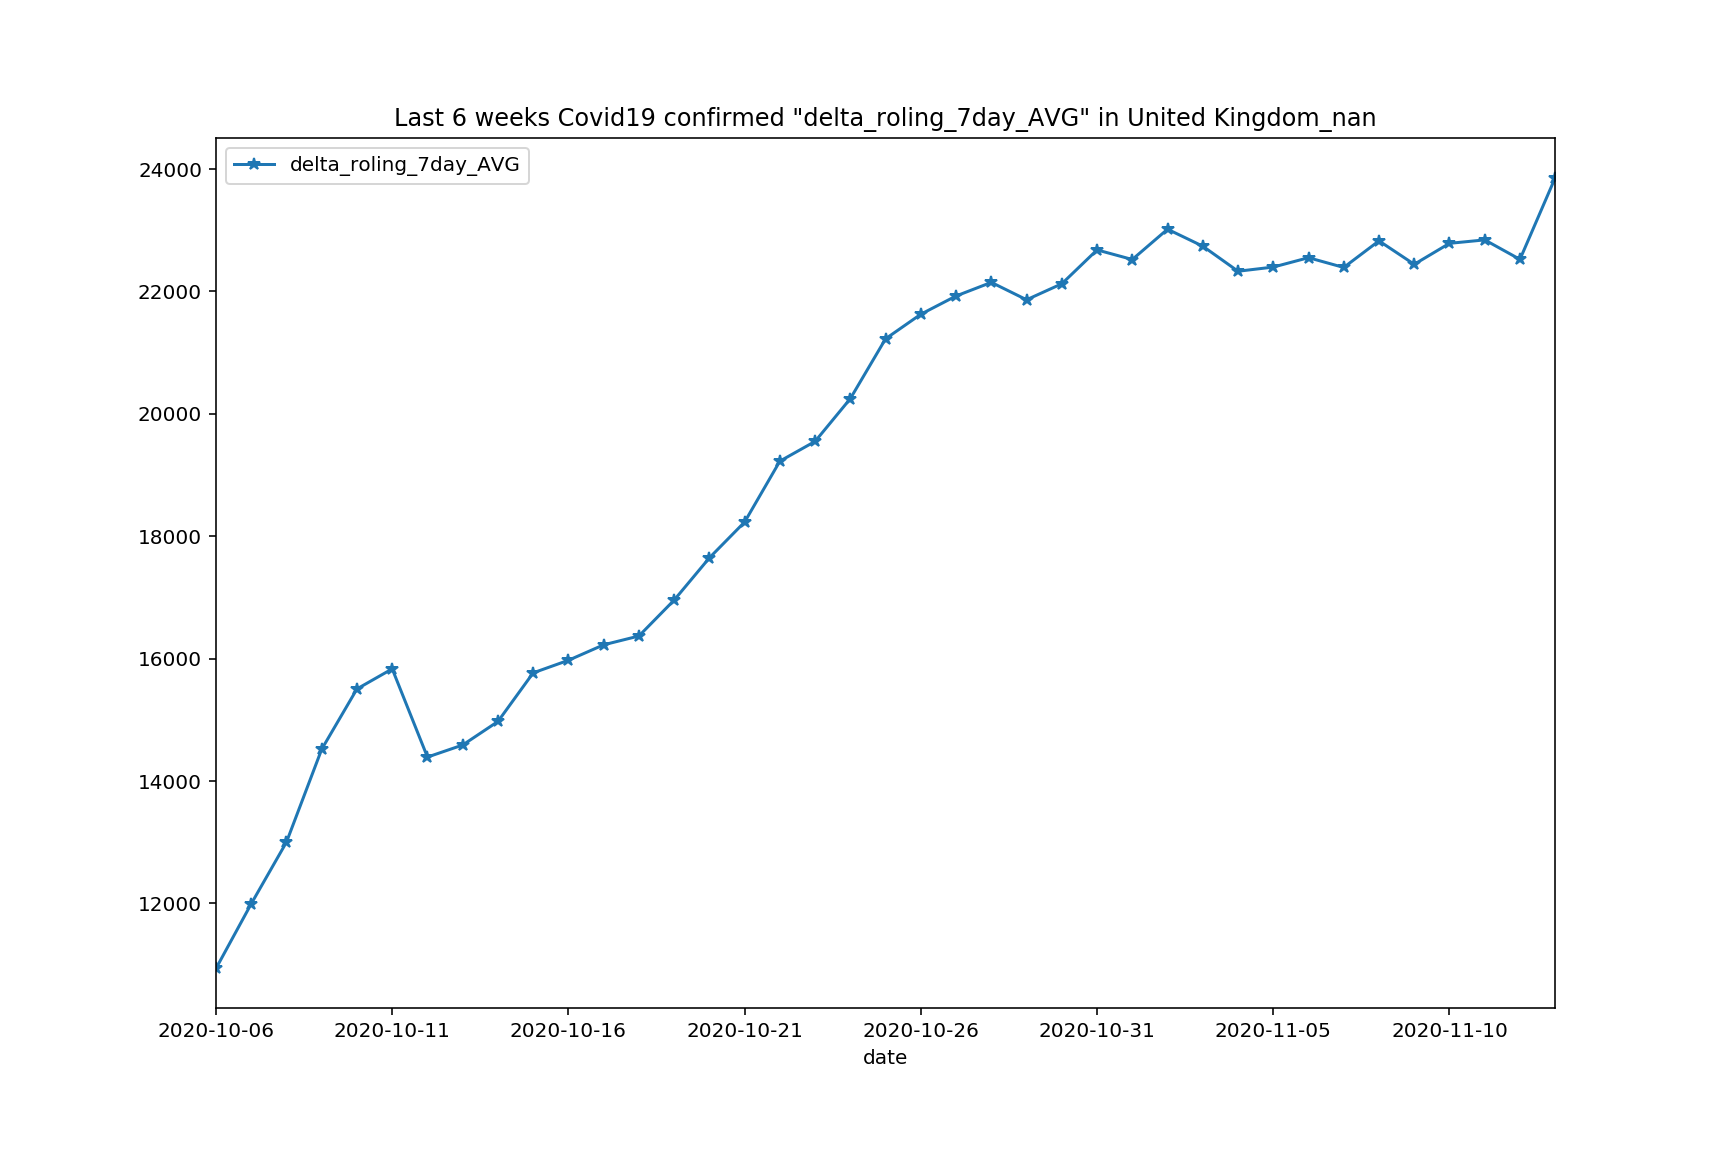

In [50]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


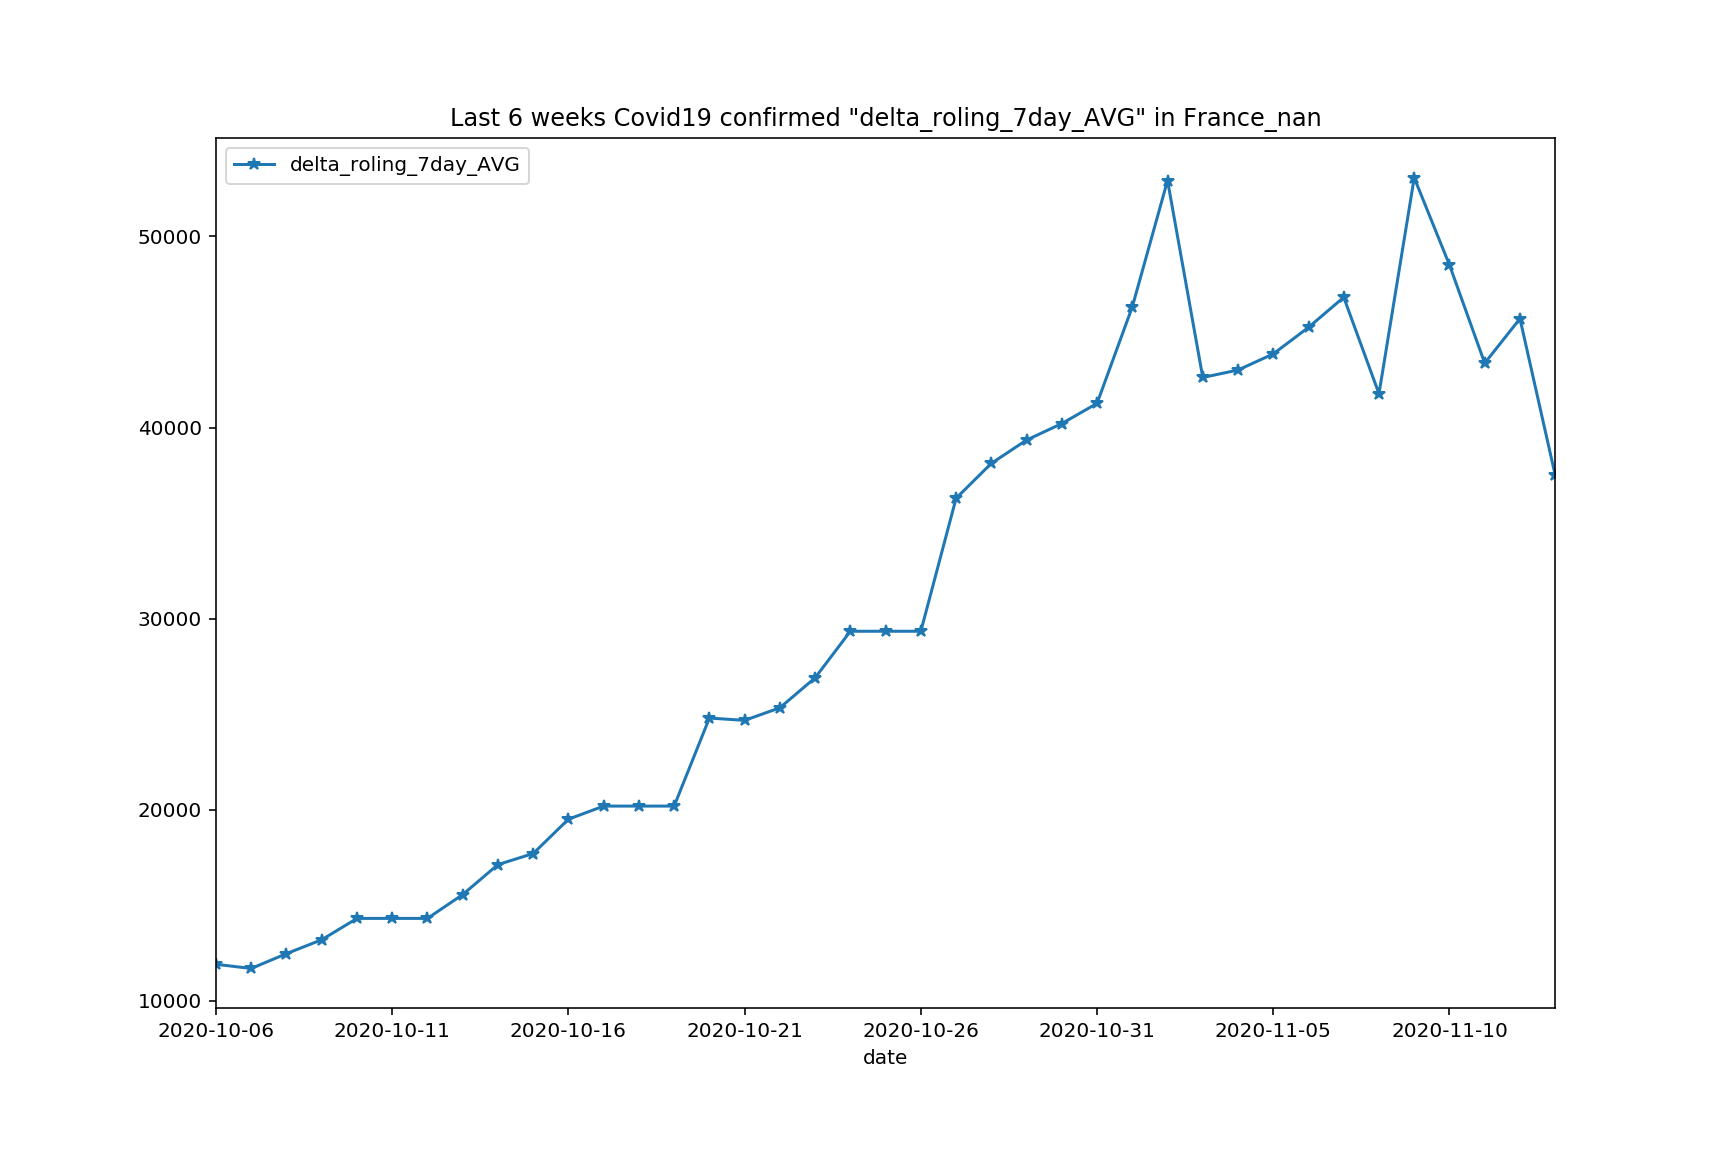

In [51]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


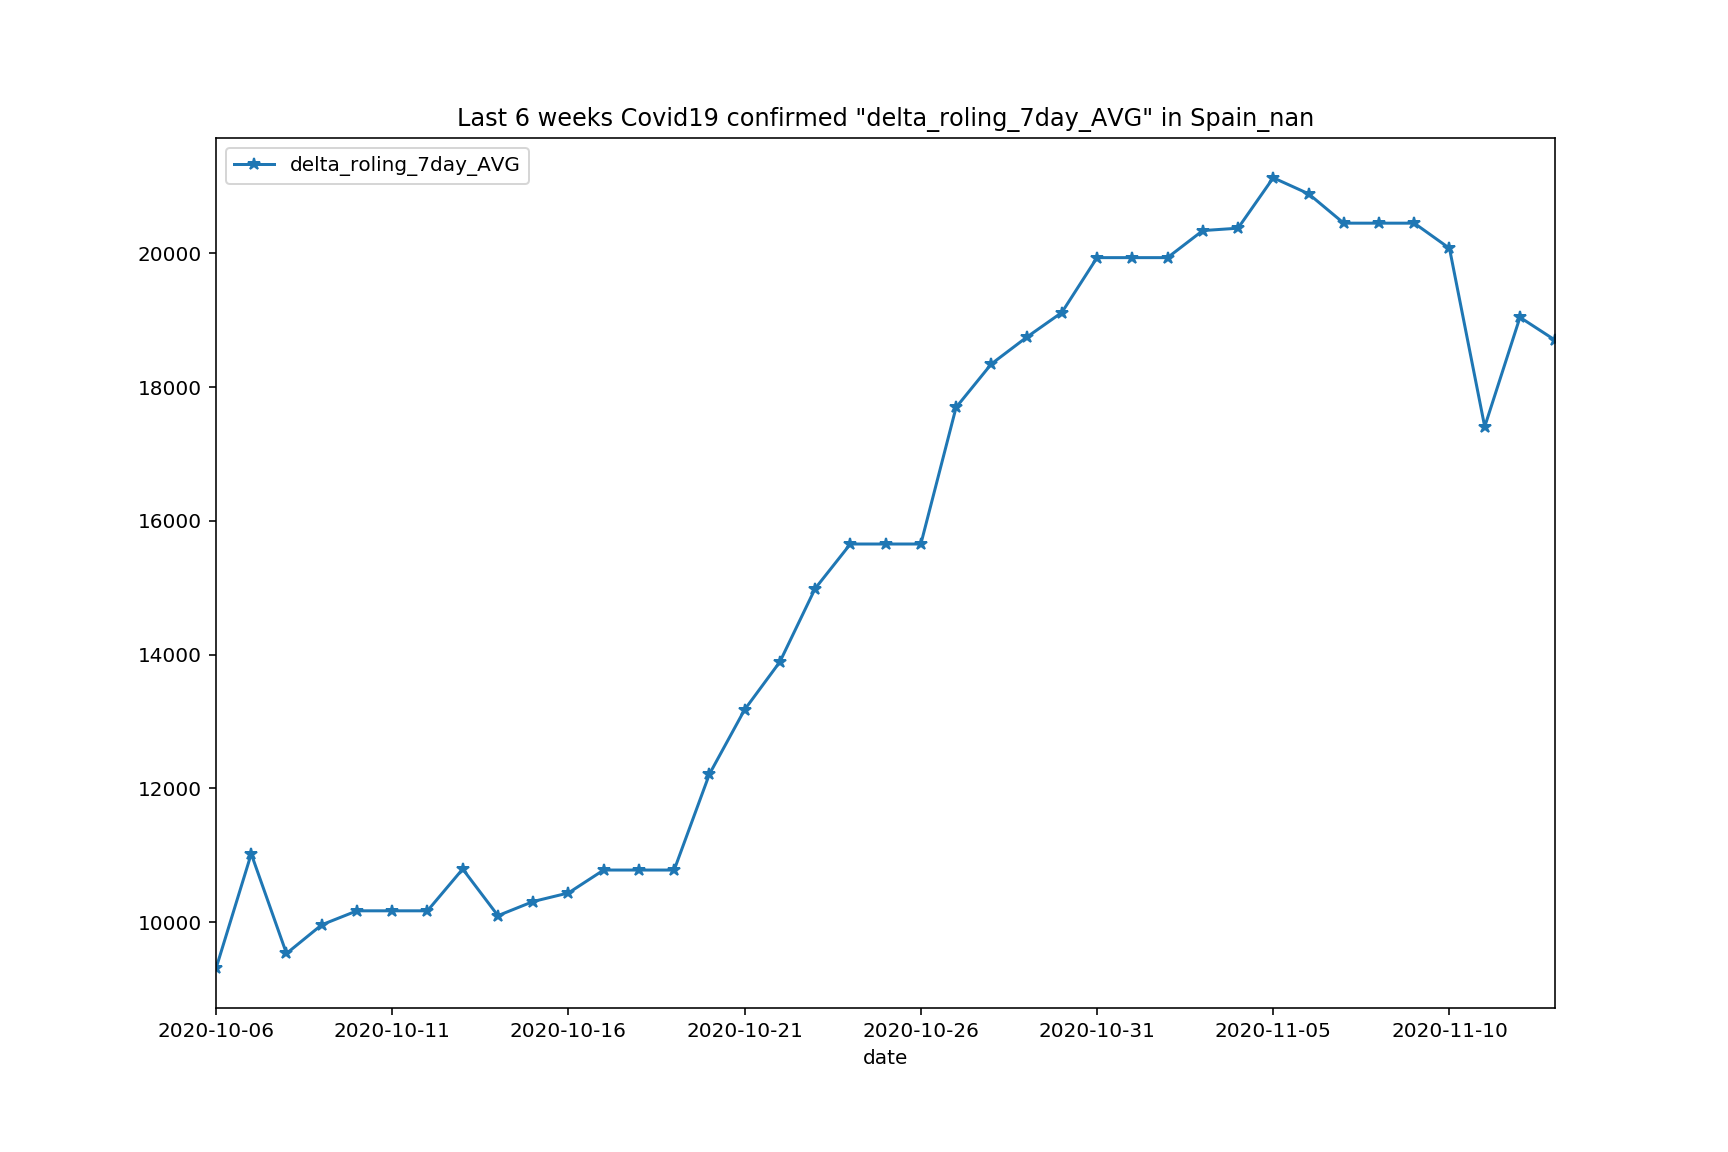

In [52]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


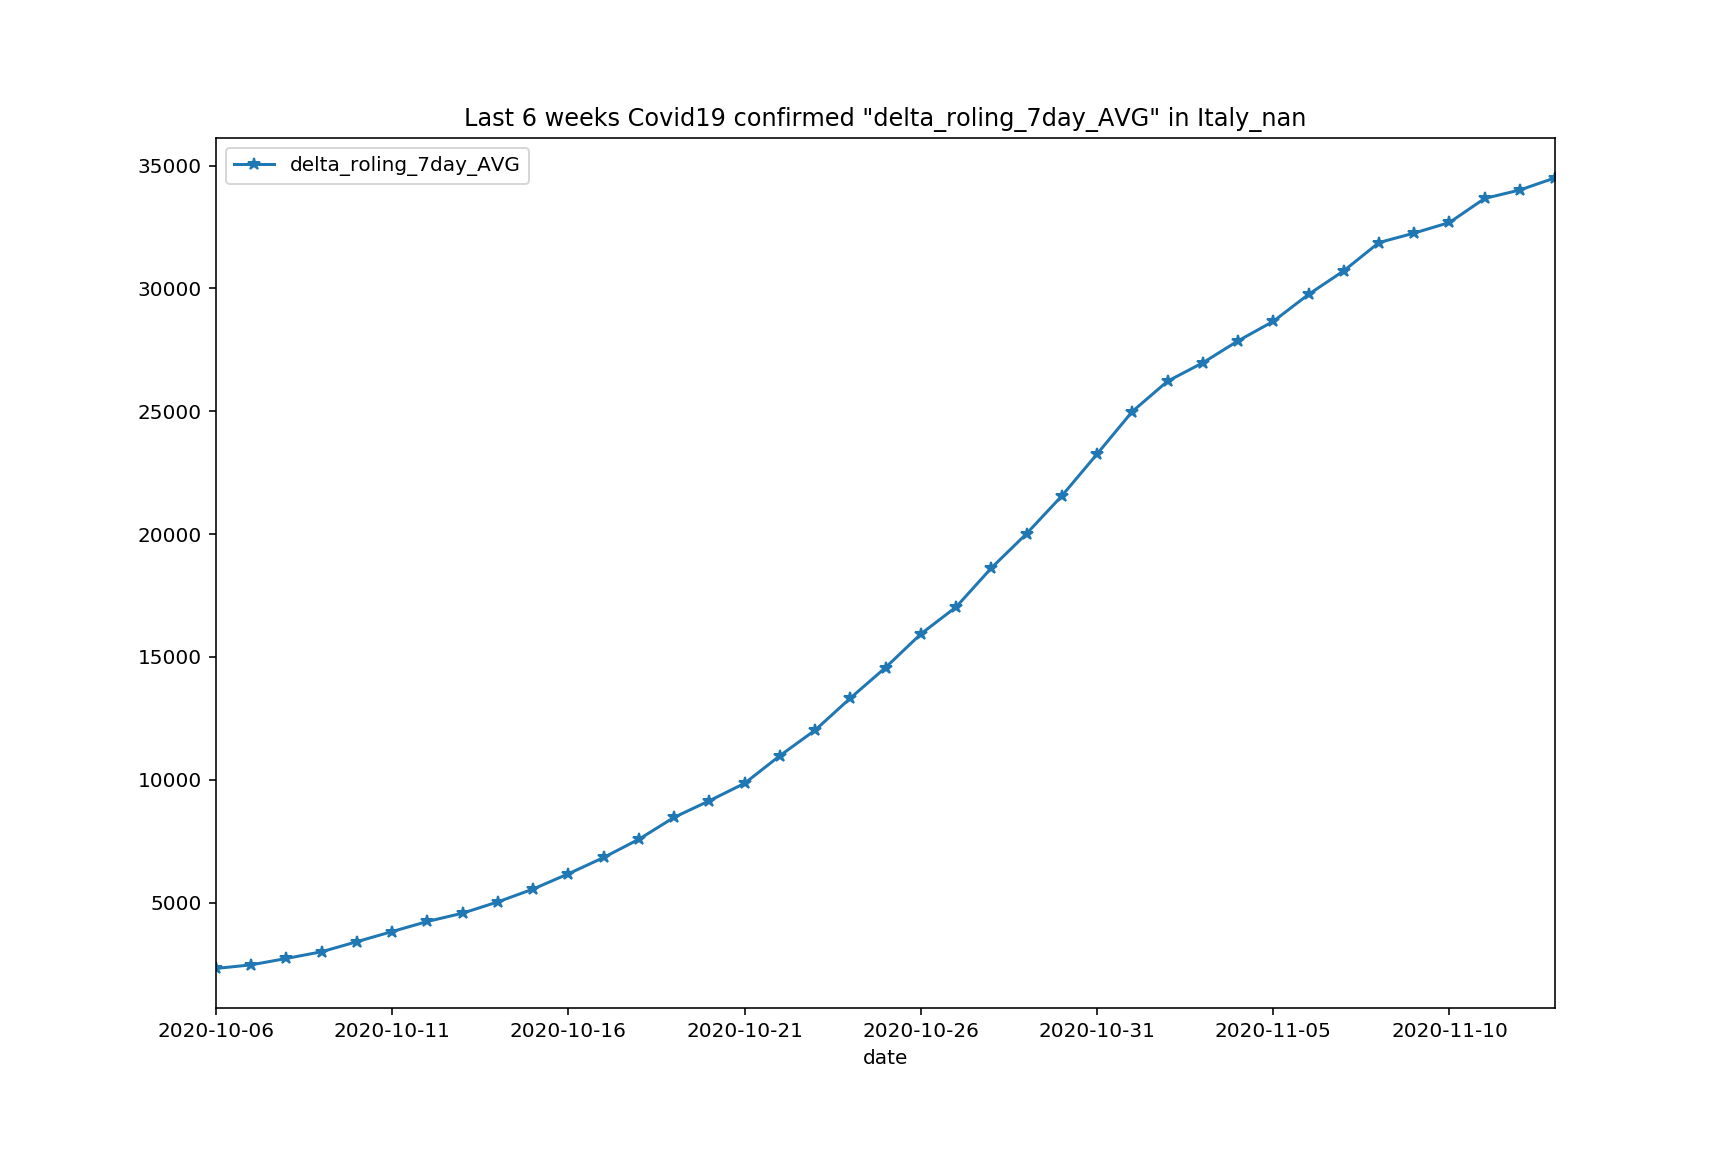

In [53]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


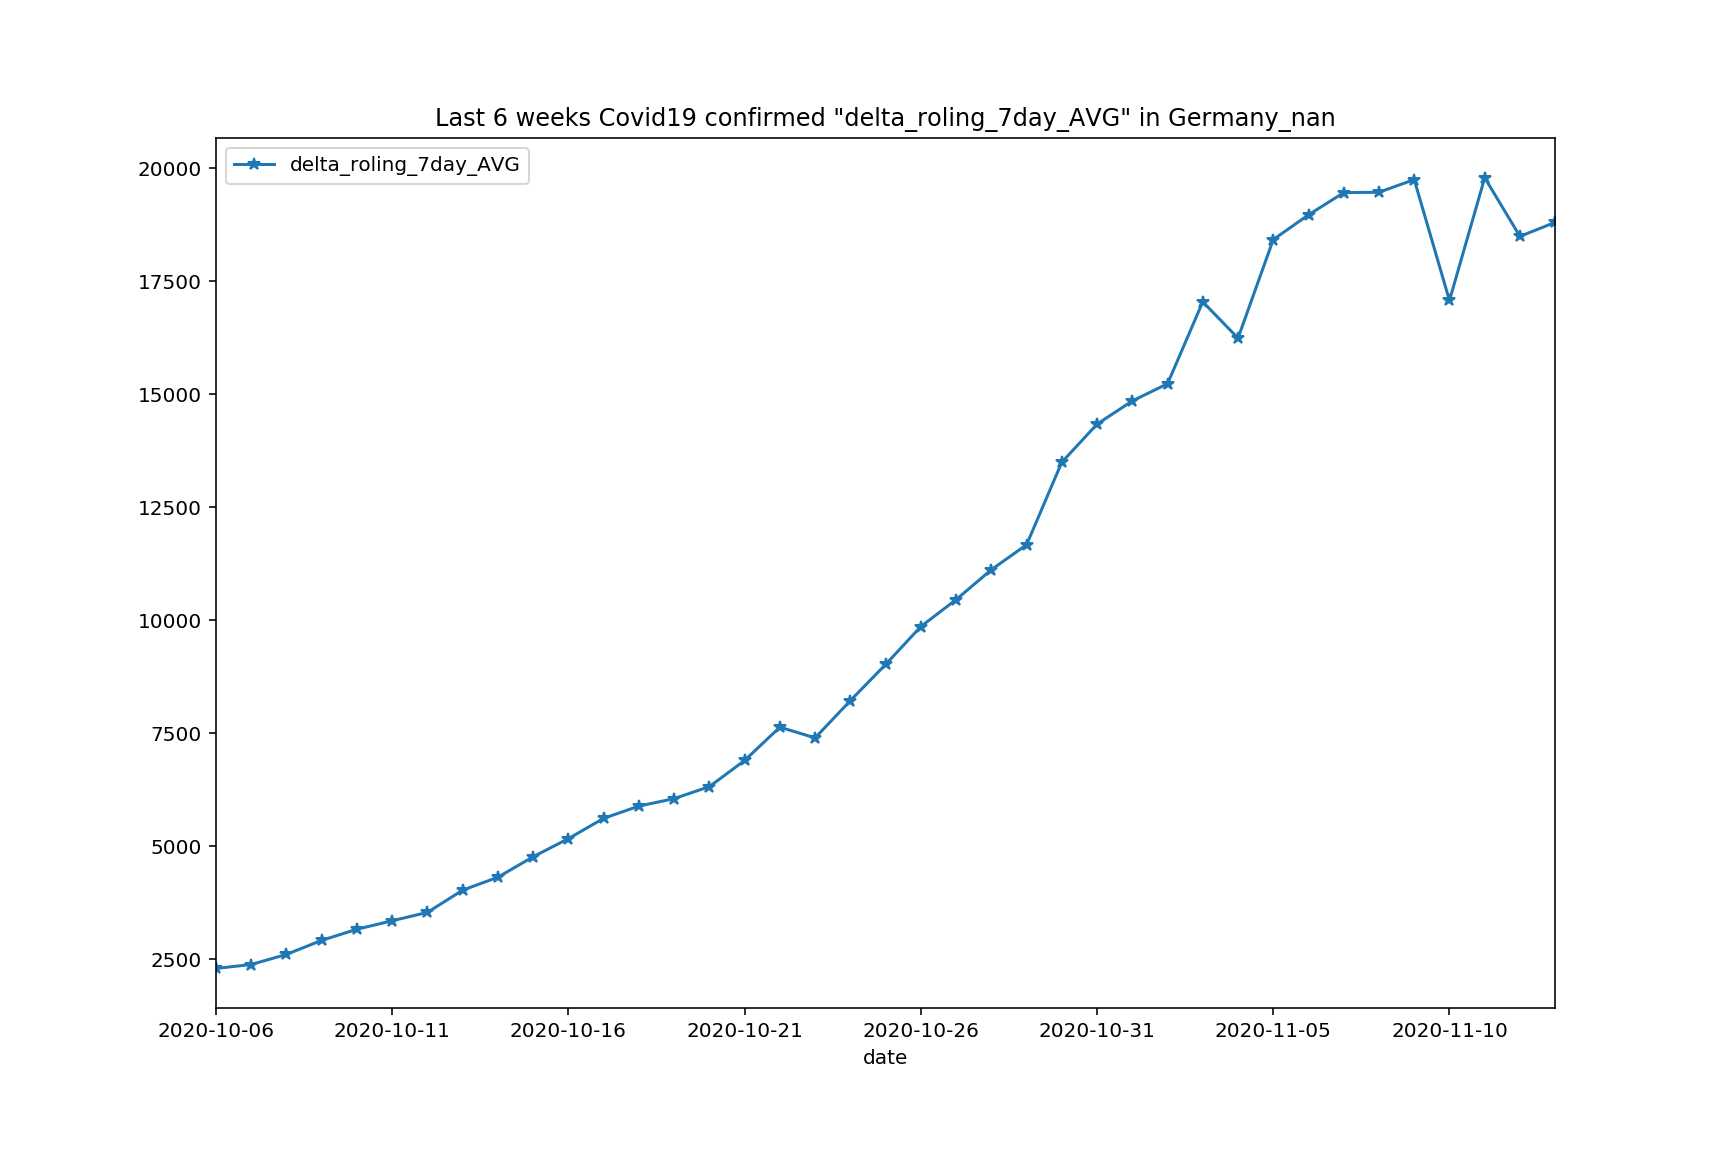

In [54]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


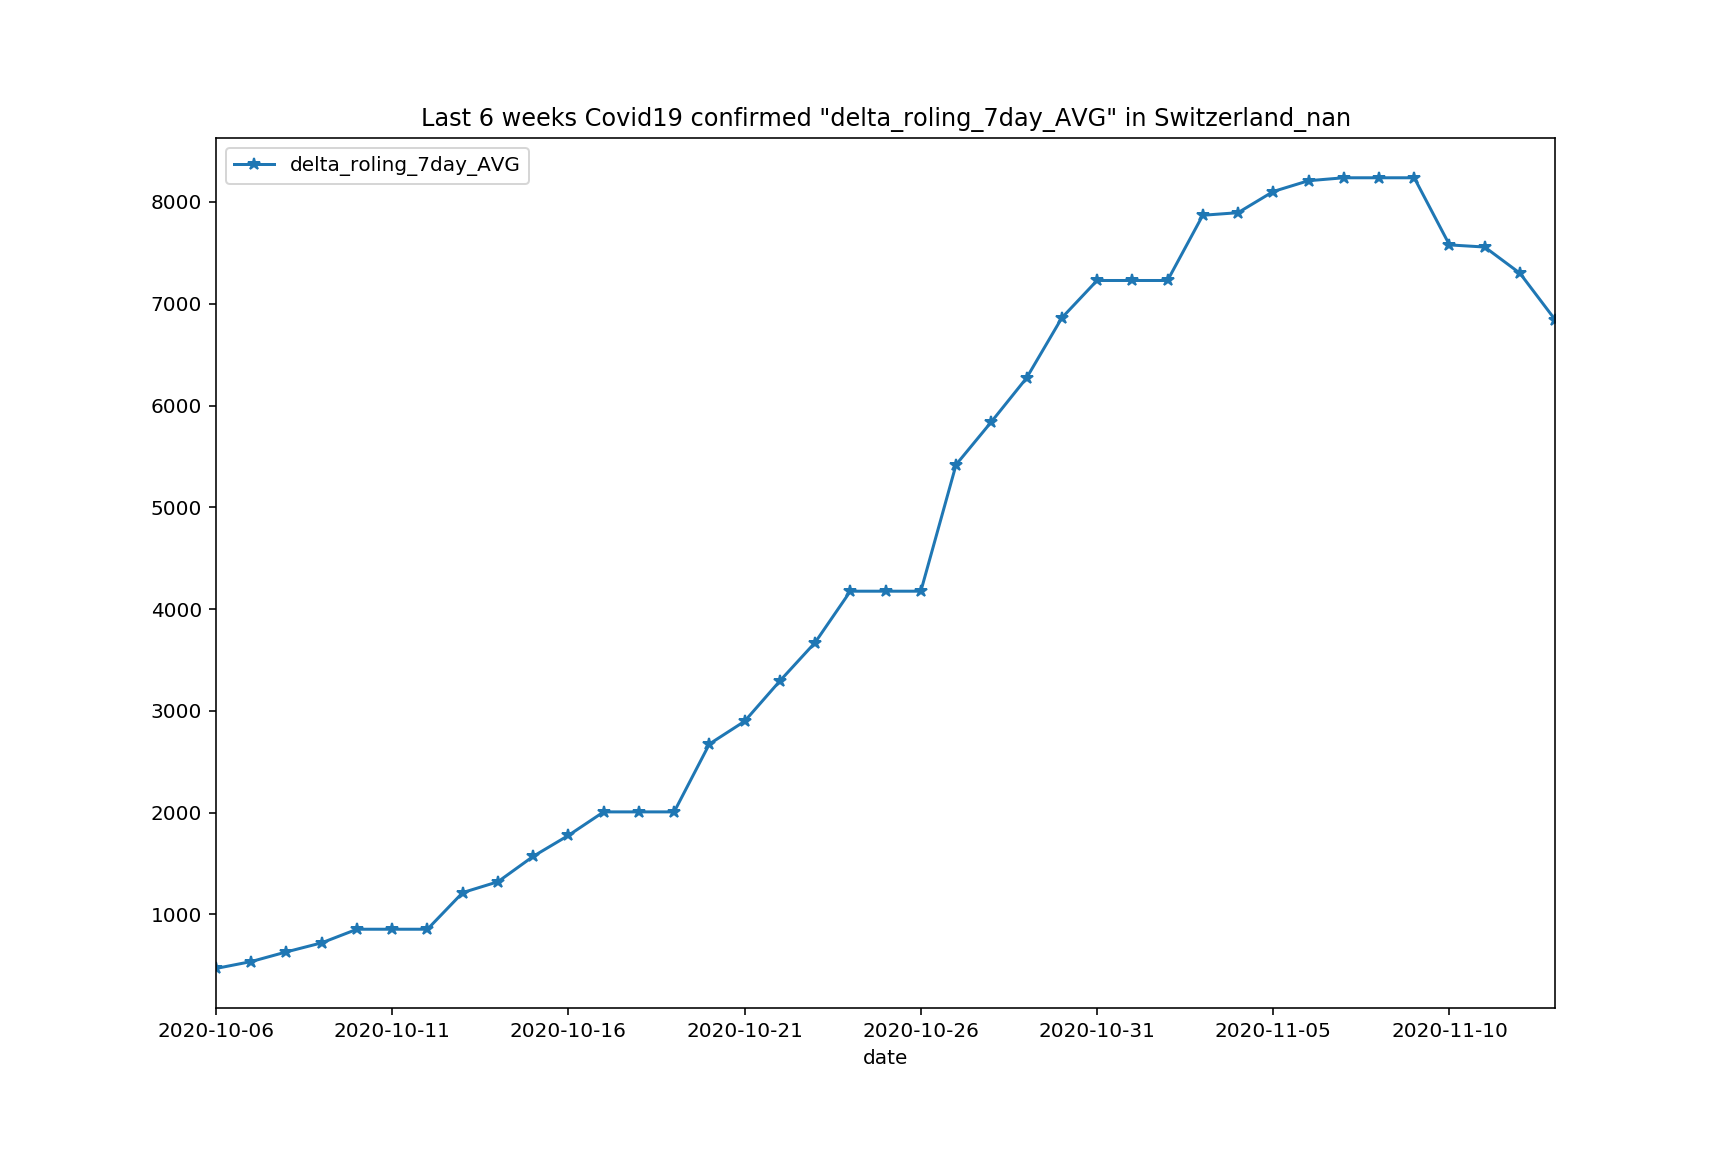

In [55]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


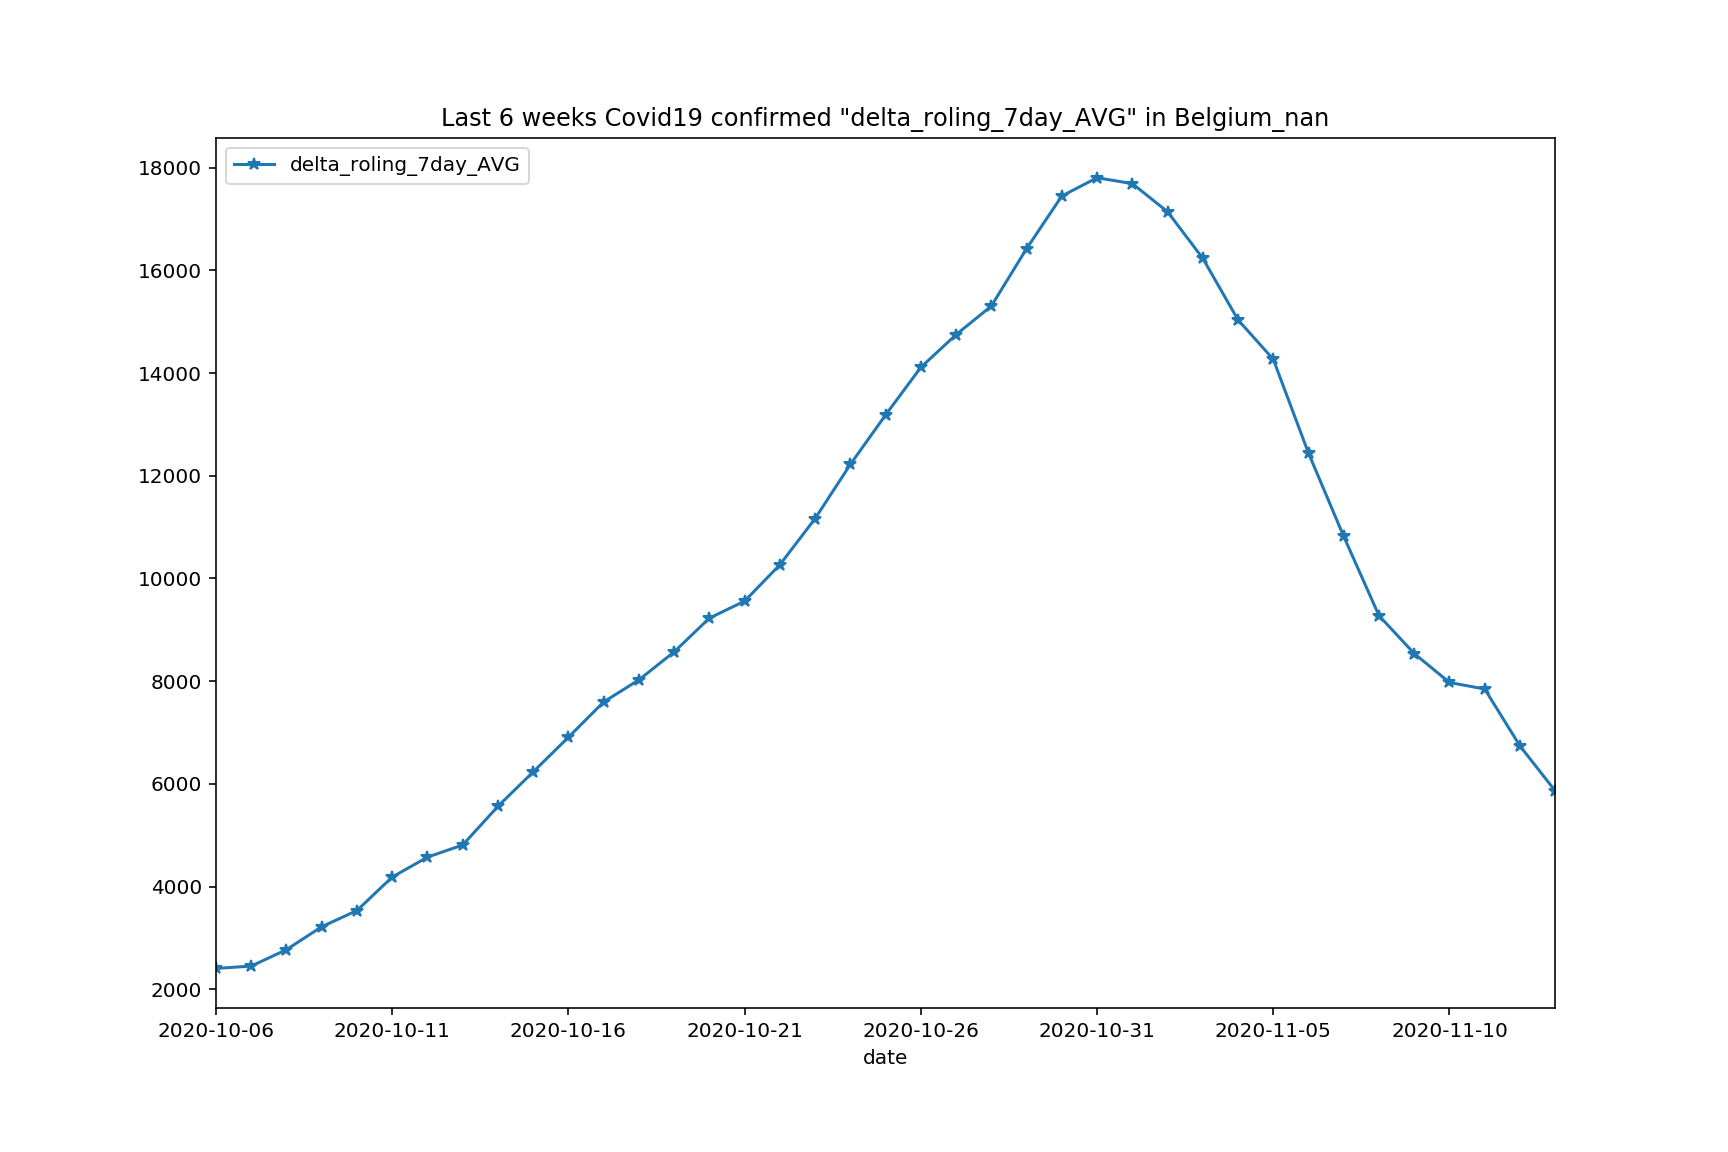

In [56]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


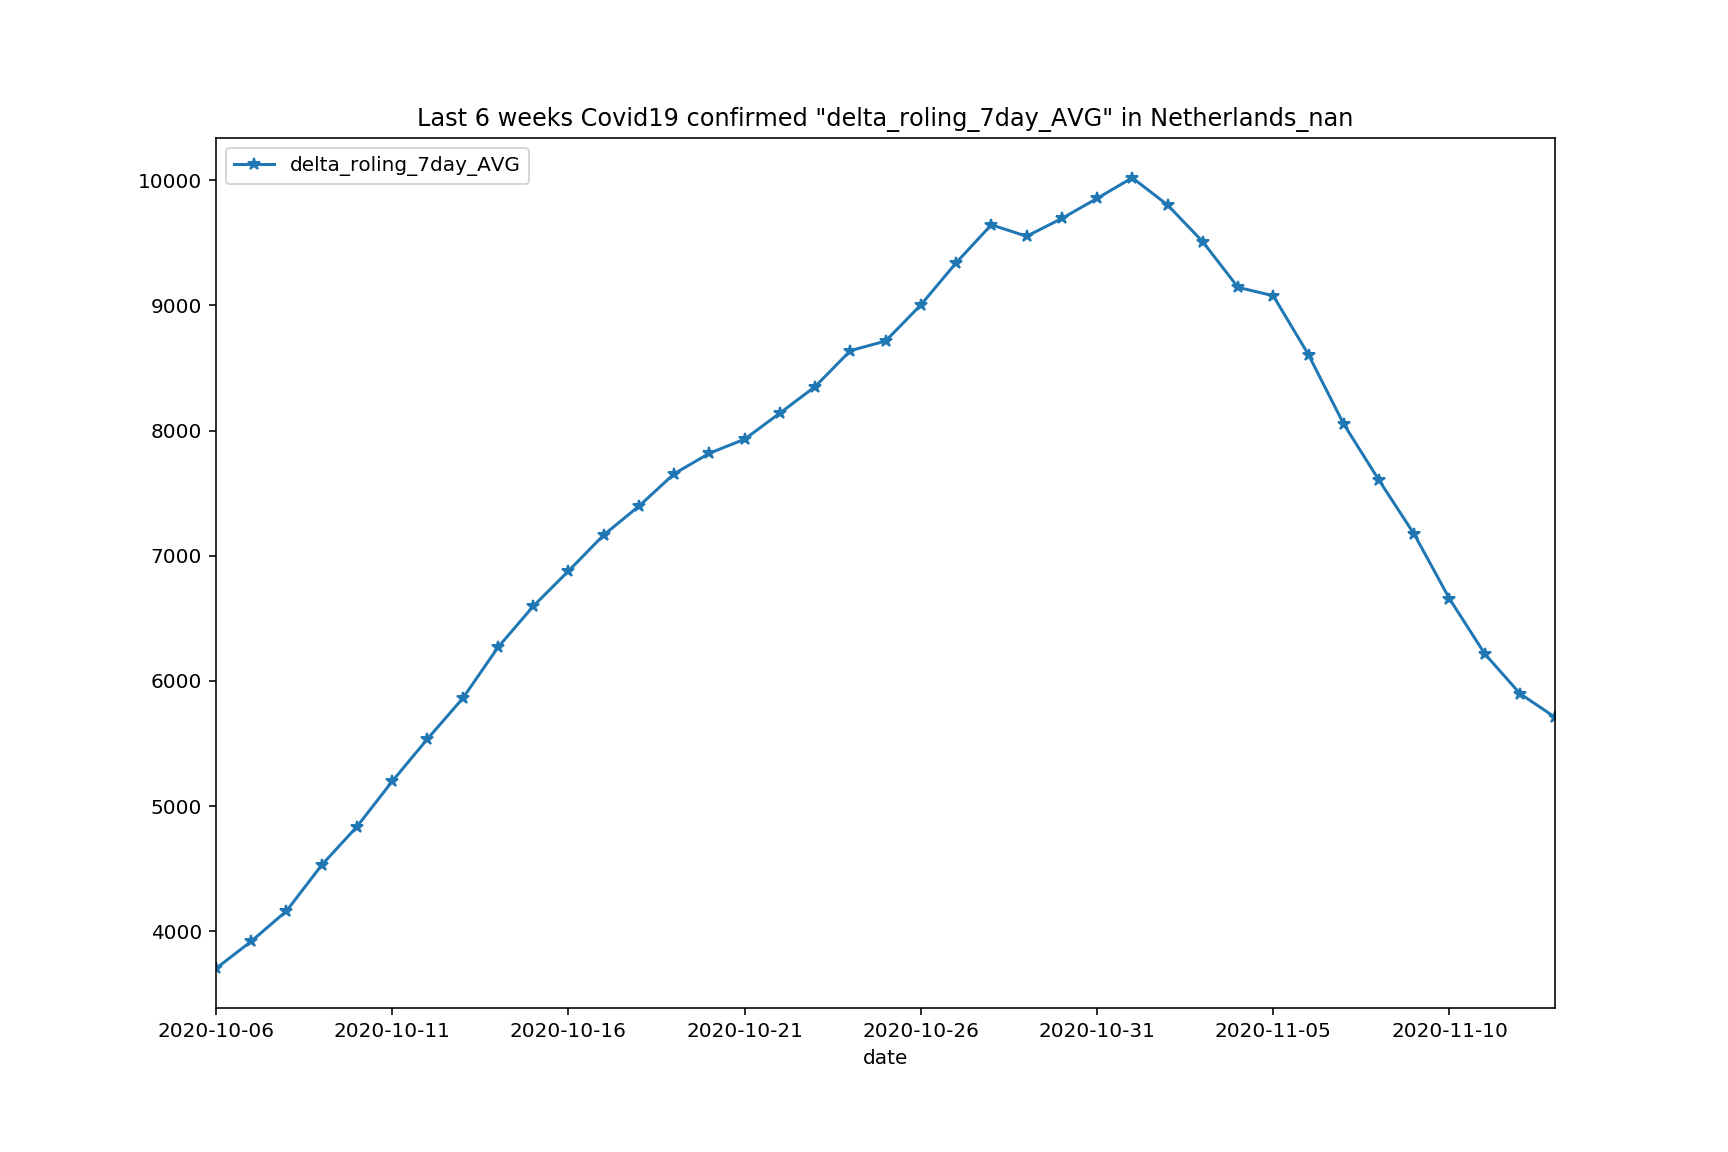

In [57]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


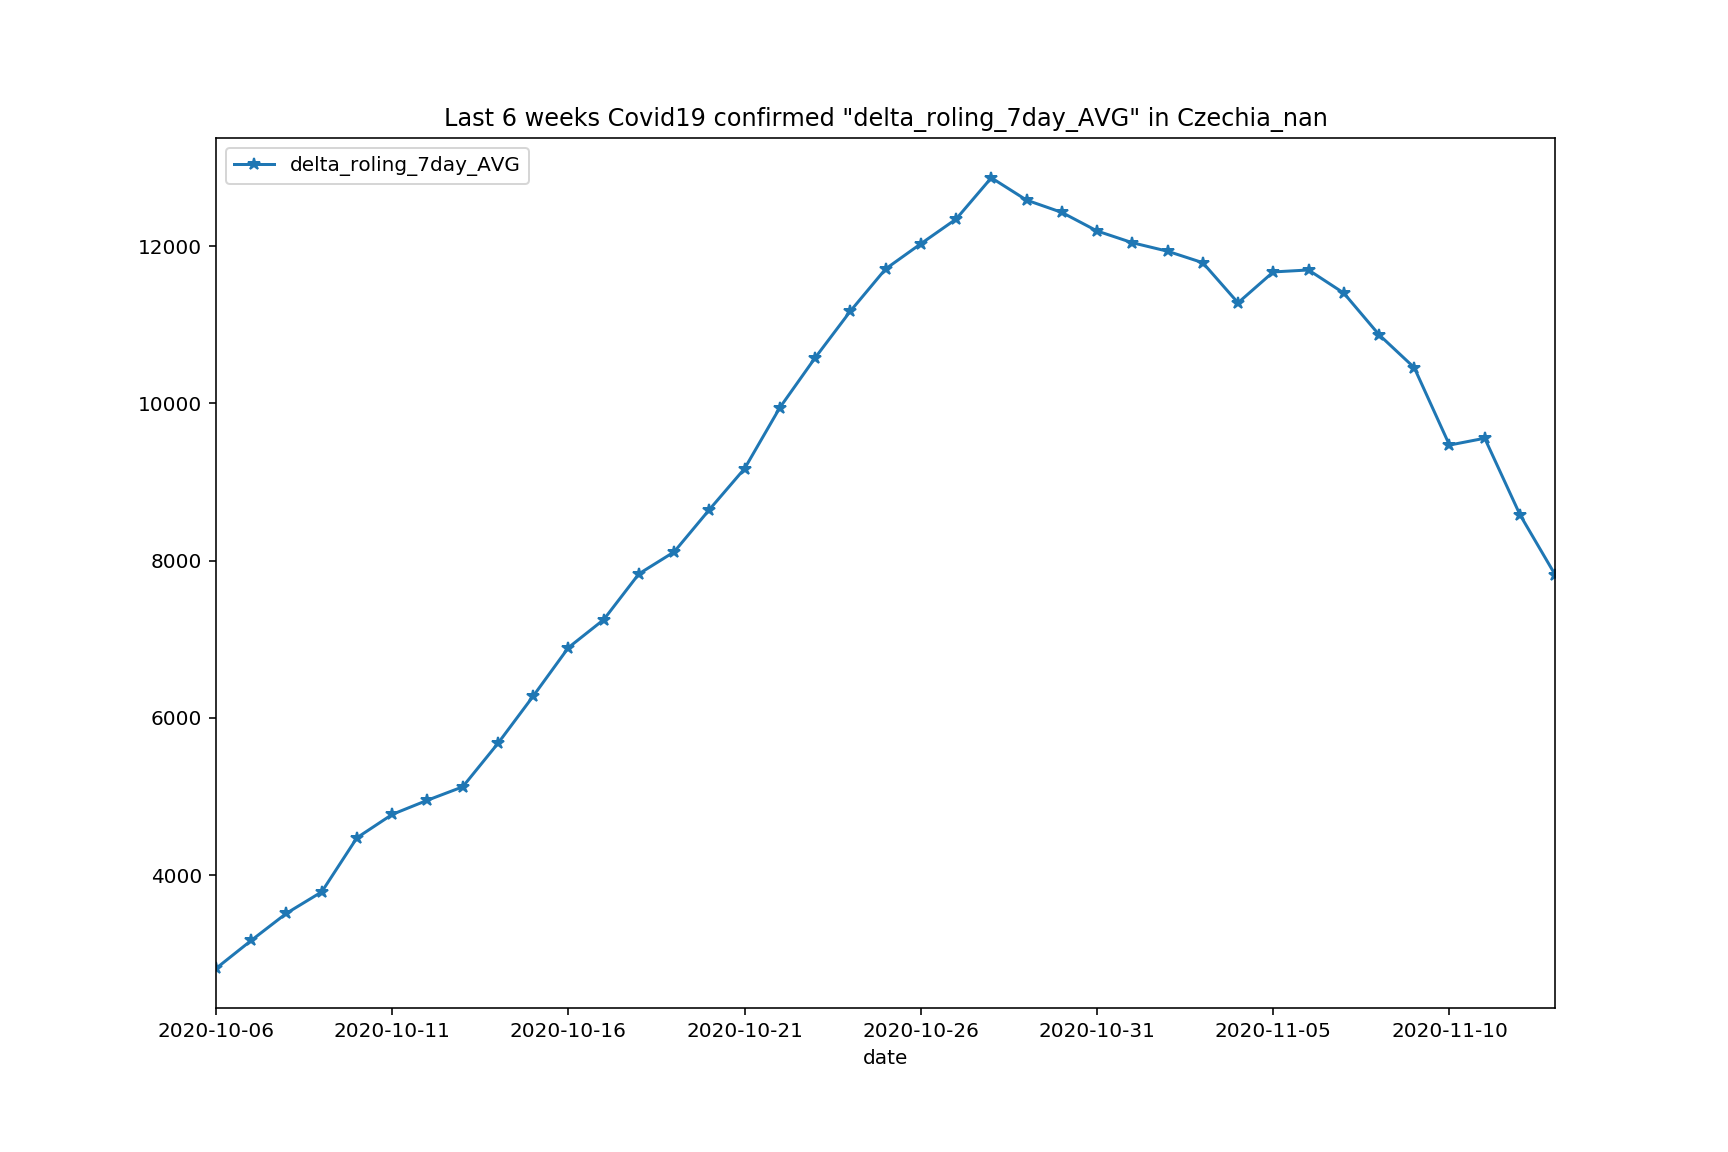

In [58]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


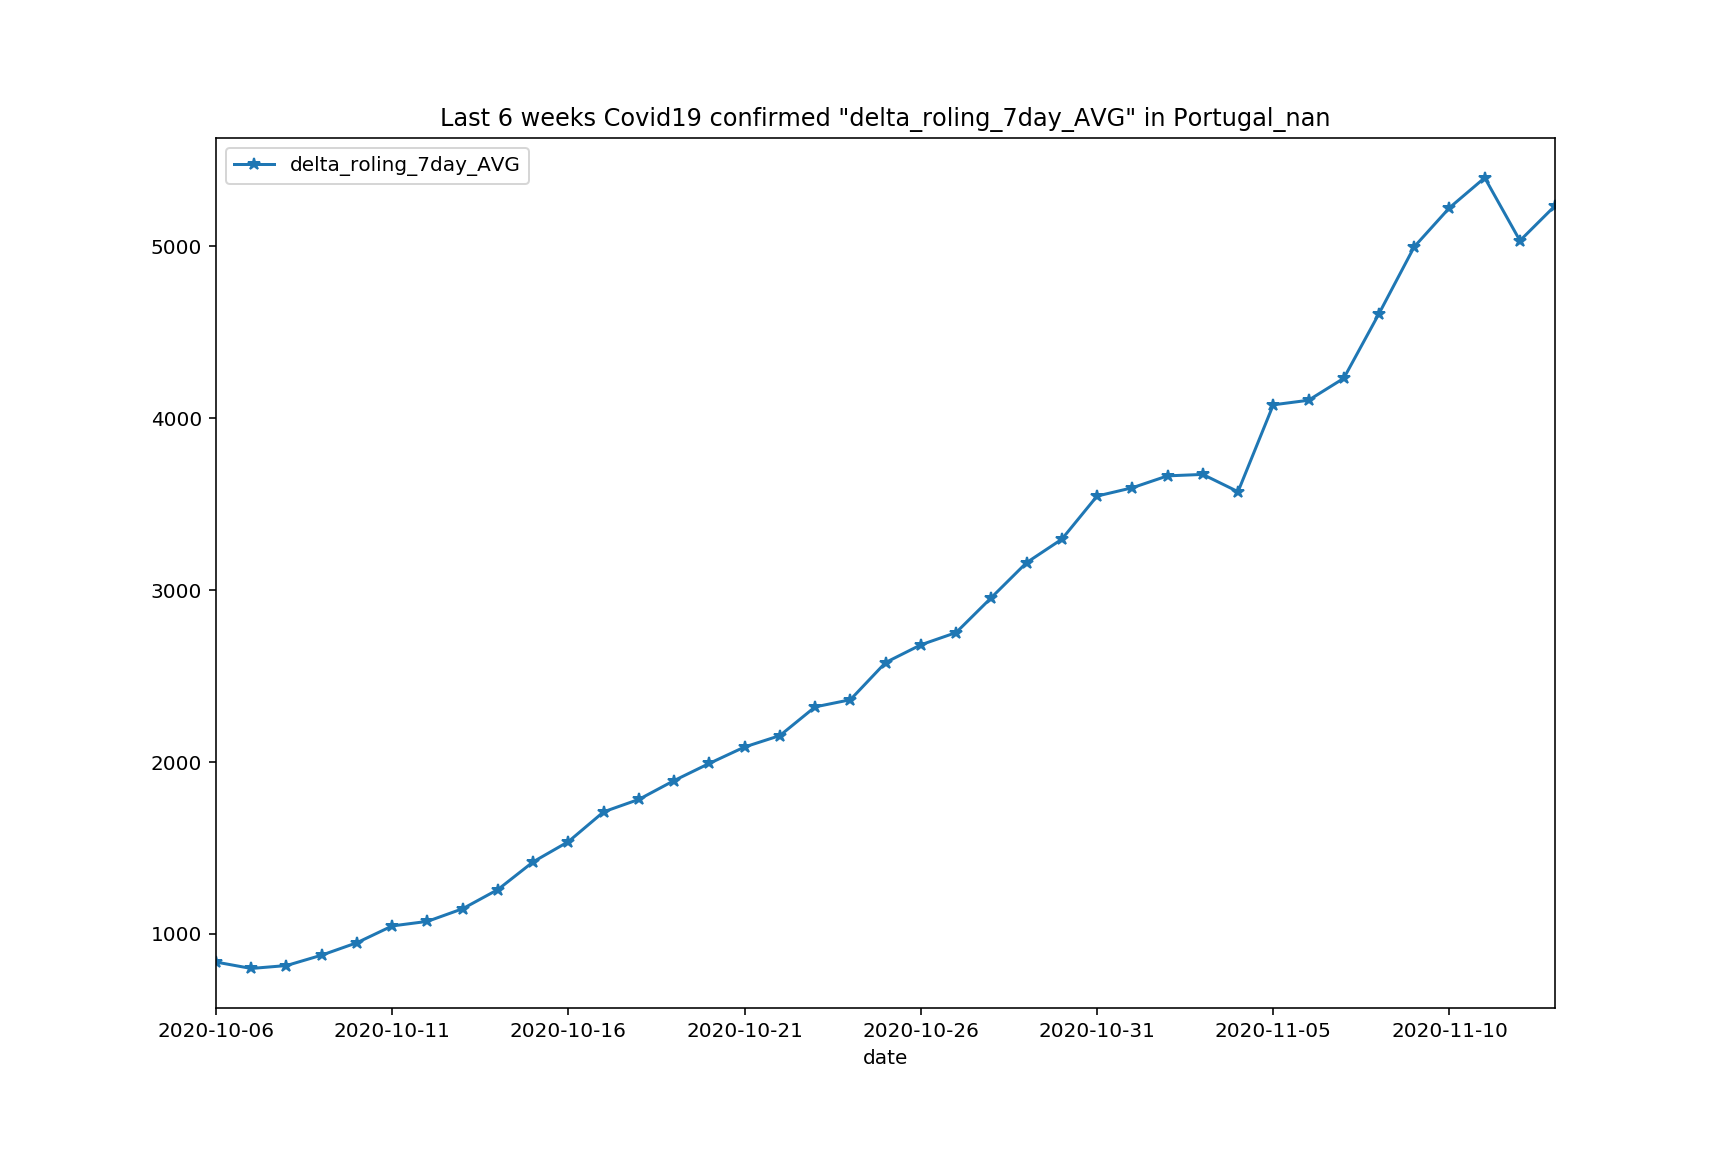

In [59]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [60]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [61]:
exit()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
